In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

# Livro de Marcos 

In [5]:
Marcos_1 = "The beginning of the gospel of Jesus Christ, the Son of God;As it is written in the prophets, Behold, I send my messenger before your face, which shall prepare your way before you.The voice of one crying in the wilderness, Prepare you the way of the Lord, make his paths straight.John did baptize in the wilderness, and preach the baptism of repentance for the remission of sins.And there went out to him all the land of Judaea, and they of Jerusalem, and were all baptized of him in the river of Jordan, confessing their sins.And John was clothed with camel' hair, and with a girdle of a skin about his loins; and he did eat locusts and wild honey;And preached, saying, There comes one mightier than I after me, the lace of whose shoes I am not worthy to stoop down and unloose.I indeed have baptized you with water: but he shall baptize you with the Holy Ghost.And it came to pass in those days, that Jesus came from Nazareth of Galilee, and was baptized of John in Jordan.And straightway coming up out of the water, he saw the heavens opened, and the Spirit like a dove descending on him:And there came a voice from heaven, saying, You are my beloved Son, in whom I am well pleased.And immediately the spirit drives him into the wilderness.And he was there in the wilderness forty days, tempted of Satan; and was with the wild beasts; and the angels ministered to him.Now after that John was put in prison, Jesus came into Galilee, preaching the gospel of the kingdom of God,And saying, The time is fulfilled, and the kingdom of God is at hand: repent you, and believe the gospel.Now as he walked by the sea of Galilee, he saw Simon and Andrew his brother casting a net into the sea: for they were fishers.And Jesus said to them, Come you after me, and I will make you to become fishers of men.And straightway they forsook their nets, and followed him.And when he had gone a little farther there, he saw James the son of Zebedee, and John his brother, who also were in the ship mending their nets.And straightway he called them: and they left their father Zebedee in the ship with the hired servants, and went after him.And they went into Capernaum; and straightway on the sabbath day he entered into the synagogue, and taught.And they were astonished at his doctrine: for he taught them as one that had authority, and not as the scribes.And there was in their synagogue a man with an unclean spirit; and he cried out,Saying, Let us alone; what have we to do with you, you Jesus of Nazareth? are you come to destroy us? I know you who you are, the Holy One of God.And Jesus rebuked him, saying, Hold your peace, and come out of him.And when the unclean spirit had torn him, and cried with a loud voice, he came out of him.And they were all amazed, so that they questioned among themselves, saying, What thing is this? what new doctrine is this? for with authority commands he even the unclean spirits, and they do obey him.And immediately his fame spread abroad throughout all the region round about Galilee.And immediately, when they were come out of the synagogue, they entered into the house of Simon and Andrew, with James and John.But Simon' wife' mother lay sick of a fever, and immediately they tell him of her.And he came and took her by the hand, and lifted her up; and immediately the fever left her, and she ministered to them.And at even, when the sun did set, they brought to him all that were diseased, and them that were possessed with devils.And all the city was gathered together at the door.And he healed many that were sick of divers diseases, and cast out many devils; and suffered not the devils to speak, because they knew him.And in the morning, rising up a great while before day, he went out, and departed into a solitary place, and there prayed.And Simon and they that were with him followed after him.And when they had found him, they said to him, All men seek for you.And he said to them, Let us go into the next towns, that I may preach there also: for therefore came I forth.And he preached in their synagogues throughout all Galilee, and cast out devils.And there came a leper to him, beseeching him, and kneeling down to him, and saying to him, If you will, you can make me clean.And Jesus, moved with compassion, put forth his hand, and touched him, and said to him, I will; be you clean.And as soon as he had spoken, immediately the leprosy departed from him, and he was cleansed.And he straightly charged him, and immediately sent him away;And said to him, See you say nothing to any man: but go your way, show yourself to the priest, and offer for your cleansing those things which Moses commanded, for a testimony to them.But he went out, and began to publish it much, and to blaze abroad the matter, so that Jesus could no more openly enter into the city, but was without in desert places: and they came to him from every quarter.".lower()

In [6]:
Marcos_2 = "And again he entered into Capernaum after some days; and it was noised that he was in the house.And straightway many were gathered together, so that there was no room to receive them, no, not so much as about the door: and he preached the word to them.And they come to him, bringing one sick of the palsy, which was borne of four.And when they could not come near to him for the press, they uncovered the roof where he was: and when they had broken it up, they let down the bed wherein the sick of the palsy lay.When Jesus saw their faith, he said to the sick of the palsy, Son, your sins be forgiven you.But there was certain of the scribes sitting there, and reasoning in their hearts,Why does this man thus speak blasphemies? who can forgive sins but God only?And immediately when Jesus perceived in his spirit that they so reasoned within themselves, he said to them, Why reason you these things in your hearts?Whether is it easier to say to the sick of the palsy, Your sins be forgiven you; or to say, Arise, and take up your bed, and walk?But that you may know that the Son of man has power on earth to forgive sins, (he said to the sick of the palsy,)I say to you, Arise, and take up your bed, and go your way into your house.And immediately he arose, took up the bed, and went forth before them all; so that they were all amazed, and glorified God, saying, We never saw it on this fashion.And he went forth again by the sea side; and all the multitude resorted to him, and he taught them.And as he passed by, he saw Levi the son of Alphaeus sitting at the receipt of custom, and said to him, Follow me. And he arose and followed him.And it came to pass, that, as Jesus sat at meat in his house, many publicans and sinners sat also together with Jesus and his disciples: for there were many, and they followed him.And when the scribes and Pharisees saw him eat with publicans and sinners, they said to his disciples, How is it that he eats and drinks with publicans and sinners?When Jesus heard it, he said to them, They that are whole have no need of the physician, but they that are sick: I came not to call the righteous, but sinners to repentance.And the disciples of John and of the Pharisees used to fast: and they come and say to him, Why do the disciples of John and of the Pharisees fast, but your disciples fast not?And Jesus said to them, Can the children of the bridal chamber fast, while the bridegroom is with them? as long as they have the bridegroom with them, they cannot fast.But the days will come, when the bridegroom shall be taken away from them, and then shall they fast in those days.No man also sews a piece of new cloth on an old garment: else the new piece that filled it up takes away from the old, and the rent is made worse.And no man puts new wine into old bottles: else the new wine does burst the bottles, and the wine is spilled, and the bottles will be marred: but new wine must be put into new bottles.And it came to pass, that he went through the corn fields on the sabbath day; and his disciples began, as they went, to pluck the ears of corn.And the Pharisees said to him, Behold, why do they on the sabbath day that which is not lawful?And he said to them, Have you never read what David did, when he had need, and was an hungered, he, and they that were with him?How he went into the house of God in the days of Abiathar the high priest, and did eat the show bread, which is not lawful to eat but for the priests, and gave also to them which were with him?And he said to them, The sabbath was made for man, and not man for the sabbath:Therefore the Son of man is Lord also of the sabbath.".lower()

In [7]:
Marcos_3 = "And he entered again into the synagogue; and there was a man there which had a withered hand.And they watched him, whether he would heal him on the sabbath day; that they might accuse him.And he said to the man which had the withered hand, Stand forth.And he said to them, Is it lawful to do good on the sabbath days, or to do evil? to save life, or to kill? But they held their peace.And when he had looked round about on them with anger, being grieved for the hardness of their hearts, he said to the man, Stretch forth your hand. And he stretched it out: and his hand was restored whole as the other.And the Pharisees went forth, and straightway took counsel with the Herodians against him, how they might destroy him.But Jesus withdrew himself with his disciples to the sea: and a great multitude from Galilee followed him, and from Judaea,And from Jerusalem, and from Idumaea, and from beyond Jordan; and they about Tyre and Sidon, a great multitude, when they had heard what great things he did, came to him.And he spoke to his disciples, that a small ship should wait on him because of the multitude, lest they should throng him.For he had healed many; so that they pressed on him for to touch him, as many as had plagues.And unclean spirits, when they saw him, fell down before him, and cried, saying, You are the Son of God.And he straightly charged them that they should not make him known.And he goes up into a mountain, and calls to him whom he would: and they came to him.And he ordained twelve, that they should be with him, and that he might send them forth to preach,And to have power to heal sicknesses, and to cast out devils:And Simon he surnamed Peter;And James the son of Zebedee, and John the brother of James; and he surnamed them Boanerges, which is, The sons of thunder:And Andrew, and Philip, and Bartholomew, and Matthew, and Thomas, and James the son of Alphaeus, and Thaddaeus, and Simon the Canaanite,And Judas Iscariot, which also betrayed him: and they went into an house.And the multitude comes together again, so that they could not so much as eat bread.And when his friends heard of it, they went out to lay hold on him: for they said, He is beside himself.And the scribes which came down from Jerusalem said, He has Beelzebub, and by the prince of the devils casts he out devils.And he called them to him, and said to them in parables, How can Satan cast out Satan?And if a kingdom be divided against itself, that kingdom cannot stand.And if a house be divided against itself, that house cannot stand.And if Satan rise up against himself, and be divided, he cannot stand, but has an end.No man can enter into a strong man' house, and spoil his goods, except he will first bind the strong man; and then he will spoil his house.Truly I say to you, All sins shall be forgiven to the sons of men, and blasphemies with which soever they shall blaspheme:But he that shall blaspheme against the Holy Ghost has never forgiveness, but is in danger of eternal damnation.Because they said, He has an unclean spirit.There came then his brothers and his mother, and, standing without, sent to him, calling him.And the multitude sat about him, and they said to him, Behold, your mother and your brothers without seek for you.And he answered them, saying, Who is my mother, or my brothers?And he looked round about on them which sat about him, and said, Behold my mother and my brothers!For whoever shall do the will of God, the same is my brother, and my sister, and mother.".lower()

In [8]:
Marcos_4 = "And he began again to teach by the sea side: and there was gathered to him a great multitude, so that he entered into a ship, and sat in the sea; and the whole multitude was by the sea on the land.And he taught them many things by parables, and said to them in his doctrine,Listen; Behold, there went out a sower to sow:And it came to pass, as he sowed, some fell by the way side, and the fowls of the air came and devoured it up.And some fell on stony ground, where it had not much earth; and immediately it sprang up, because it had no depth of earth:But when the sun was up, it was scorched; and because it had no root, it withered away.And some fell among thorns, and the thorns grew up, and choked it, and it yielded no fruit.And other fell on good ground, and did yield fruit that sprang up and increased; and brought forth, some thirty, and some sixty, and some an hundred.And he said to them, He that has ears to hear, let him hear.And when he was alone, they that were about him with the twelve asked of him the parable.And he said to them, To you it is given to know the mystery of the kingdom of God: but to them that are without, all these things are done in parables:That seeing they may see, and not perceive; and hearing they may hear, and not understand; lest at any time they should be converted, and their sins should be forgiven them.And he said to them, Know you not this parable? and how then will you know all parables?The sower sows the word.And these are they by the way side, where the word is sown; but when they have heard, Satan comes immediately, and takes away the word that was sown in their hearts.And these are they likewise which are sown on stony ground; who, when they have heard the word, immediately receive it with gladness;And have no root in themselves, and so endure but for a time: afterward, when affliction or persecution rises for the word' sake, immediately they are offended.And these are they which are sown among thorns; such as hear the word,And the cares of this world, and the deceitfulness of riches, and the lusts of other things entering in, choke the word, and it becomes unfruitful.And these are they which are sown on good ground; such as hear the word, and receive it, and bring forth fruit, some thirty times, some sixty, and some an hundred.And he said to them, Is a candle brought to be put under a bushel, or under a bed? and not to be set on a candlestick?For there is nothing hid, which shall not be manifested; neither was any thing kept secret, but that it should come abroad.If any man have ears to hear, let him hear.And he said to them, Take heed what you hear: with what measure you mete, it shall be measured to you: and to you that hear shall more be given.For he that has, to him shall be given: and he that has not, from him shall be taken even that which he has.And he said, So is the kingdom of God, as if a man should cast seed into the ground;And should sleep, and rise night and day, and the seed should spring and grow up, he knows not how.For the earth brings forth fruit of herself; first the blade, then the ear, after that the full corn in the ear.But when the fruit is brought forth, immediately he puts in the sickle, because the harvest is come.And he said, Whereunto shall we liken the kingdom of God? or with what comparison shall we compare it?It is like a grain of mustard seed, which, when it is sown in the earth, is less than all the seeds that be in the earth:But when it is sown, it grows up, and becomes greater than all herbs, and shoots out great branches; so that the fowls of the air may lodge under the shadow of it.And with many such parables spoke he the word to them, as they were able to hear it.But without a parable spoke he not to them: and when they were alone, he expounded all things to his disciples.And the same day, when the even was come, he said to them, Let us pass over to the other side.And when they had sent away the multitude, they took him even as he was in the ship. And there were also with him other little ships.And there arose a great storm of wind, and the waves beat into the ship, so that it was now full.And he was in the hinder part of the ship, asleep on a pillow: and they awake him, and say to him, Master, care you not that we perish?And he arose, and rebuked the wind, and said to the sea, Peace, be still. And the wind ceased, and there was a great calm.And he said to them, Why are you so fearful? how is it that you have no faith?And they feared exceedingly, and said one to another, What manner of man is this, that even the wind and the sea obey him?".lower()

In [9]:
Marcos_5 = "And they came over to the other side of the sea, into the country of the Gadarenes.And when he was come out of the ship, immediately there met him out of the tombs a man with an unclean spirit,Who had his dwelling among the tombs; and no man could bind him, no, not with chains:Because that he had been often bound with fetters and chains, and the chains had been plucked asunder by him, and the fetters broken in pieces: neither could any man tame him.And always, night and day, he was in the mountains, and in the tombs, crying, and cutting himself with stones.But when he saw Jesus afar off, he ran and worshipped him,And cried with a loud voice, and said, What have I to do with you, Jesus, you Son of the most high God? I adjure you by God, that you torment me not.For he said to him, Come out of the man, you unclean spirit.And he asked him, What is your name? And he answered, saying, My name is Legion: for we are many.And he sought him much that he would not send them away out of the country.Now there was there near to the mountains a great herd of swine feeding.And all the devils sought him, saying, Send us into the swine, that we may enter into them.And immediately Jesus gave them leave. And the unclean spirits went out, and entered into the swine: and the herd ran violently down a steep place into the sea, (they were about two thousand;) and were choked in the sea.And they that fed the swine fled, and told it in the city, and in the country. And they went out to see what it was that was done.And they come to Jesus, and see him that was possessed with the devil, and had the legion, sitting, and clothed, and in his right mind: and they were afraid.And they that saw it told them how it befell to him that was possessed with the devil, and also concerning the swine.And they began to pray him to depart out of their coasts.And when he was come into the ship, he that had been possessed with the devil prayed him that he might be with him.However, Jesus suffered him not, but said to him, Go home to your friends, and tell them how great things the Lord has done for you, and has had compassion on you.And he departed, and began to publish in Decapolis how great things Jesus had done for him: and all men did marvel.And when Jesus was passed over again by ship to the other side, much people gathered to him: and he was near to the sea.And, behold, there comes one of the rulers of the synagogue, Jairus by name; and when he saw him, he fell at his feet,And sought him greatly, saying, My little daughter lies at the point of death: I pray you, come and lay your hands on her, that she may be healed; and she shall live.And Jesus went with him; and much people followed him, and thronged him.And a certain woman, which had an issue of blood twelve years,And had suffered many things of many physicians, and had spent all that she had, and was nothing bettered, but rather grew worse,When she had heard of Jesus, came in the press behind, and touched his garment.For she said, If I may touch but his clothes, I shall be whole.And straightway the fountain of her blood was dried up; and she felt in her body that she was healed of that plague.And Jesus, immediately knowing in himself that virtue had gone out of him, turned him about in the press, and said, Who touched my clothes?And his disciples said to him, You see the multitude thronging you, and say you, Who touched me?And he looked round about to see her that had done this thing.But the woman fearing and trembling, knowing what was done in her, came and fell down before him, and told him all the truth.And he said to her, Daughter, your faith has made you whole; go in peace, and be whole of your plague.While he yet spoke, there came from the ruler of the synagogue' house certain which said, Your daughter is dead: why trouble you the Master any further?As soon as Jesus heard the word that was spoken, he said to the ruler of the synagogue, Be not afraid, only believe.And he suffered no man to follow him, save Peter, and James, and John the brother of James.And he comes to the house of the ruler of the synagogue, and sees the tumult, and them that wept and wailed greatly.And when he was come in, he said to them, Why make you this ado, and weep? the damsel is not dead, but sleeps.And they laughed him to scorn. But when he had put them all out, he takes the father and the mother of the damsel, and them that were with him, and enters in where the damsel was lying.And he took the damsel by the hand, and said to her, Talitha cumi; which is, being interpreted, Damsel, I say to you, arise.And straightway the damsel arose, and walked; for she was of the age of twelve years. And they were astonished with a great astonishment.And he charged them straightly that no man should know it; and commanded that something should be given her to eat.".lower()

In [10]:
Marcos_6 = "And he went out from there, and came into his own country; and his disciples follow him.And when the sabbath day was come, he began to teach in the synagogue: and many hearing him were astonished, saying, From where has this man these things? and what wisdom is this which is given to him, that even such mighty works are worked by his hands?Is not this the carpenter, the son of Mary, the brother of James, and Joses, and of Juda, and Simon? and are not his sisters here with us? And they were offended at him.But Jesus, said to them, A prophet is not without honor, but in his own country, and among his own kin, and in his own house.And he could there do no mighty work, save that he laid his hands on a few sick folk, and healed them.And he marveled because of their unbelief. And he went round about the villages, teaching.And he called to him the twelve, and began to send them forth by two and two; and gave them power over unclean spirits;And commanded them that they should take nothing for their journey, save a staff only; no money, no bread, no money in their purse:But be shod with sandals; and not put on two coats.And he said to them, In what place soever you enter into an house, there abide till you depart from that place.And whoever shall not receive you, nor hear you, when you depart there, shake off the dust under your feet for a testimony against them. Truly I say to you, It shall be more tolerable for Sodom and Gomorrha in the day of judgment, than for that city.And they went out, and preached that men should repent.And they cast out many devils, and anointed with oil many that were sick, and healed them.And king Herod heard of him; (for his name was spread abroad:) and he said, That John the Baptist was risen from the dead, and therefore mighty works do show forth themselves in him.Others said, That it is Elias. And others said, That it is a prophet, or as one of the prophets.But when Herod heard thereof, he said, It is John, whom I beheaded: he is risen from the dead.For Herod himself had sent forth and laid hold on John, and bound him in prison for Herodias'sake, his brother Philip' wife: for he had married her.For John had said to Herod, It is not lawful for you to have your brother' wife.Therefore Herodias had a quarrel against him, and would have killed him; but she could not:For Herod feared John, knowing that he was a just man and an holy, and observed him; and when he heard him, he did many things, and heard him gladly.And when a convenient day was come, that Herod on his birthday made a supper to his lords, high captains, and chief estates of Galilee;And when the daughter of the said Herodias came in, and danced, and pleased Herod and them that sat with him, the king said to the damsel, Ask of me whatever you will, and I will give it you.And he swore to her, Whatever you shall ask of me, I will give it you, to the half of my kingdom.And she went forth, and said to her mother, What shall I ask? And she said, The head of John the Baptist.And she came in straightway with haste to the king, and asked, saying, I will that you give me by and by in a charger the head of John the Baptist.And the king was exceeding sorry; yet for his oath' sake, and for their sakes which sat with him, he would not reject her.And immediately the king sent an executioner, and commanded his head to be brought: and he went and beheaded him in the prison,And brought his head in a charger, and gave it to the damsel: and the damsel gave it to her mother.And when his disciples heard of it, they came and took up his corpse, and laid it in a tomb.And the apostles gathered themselves together to Jesus, and told him all things, both what they had done, and what they had taught.And he said to them, Come you yourselves apart into a desert place, and rest a while: for there were many coming and going, and they had no leisure so much as to eat.And they departed into a desert place by ship privately.And the people saw them departing, and many knew him, and ran afoot thither out of all cities, and preceded them, and came together to him.And Jesus, when he came out, saw much people, and was moved with compassion toward them, because they were as sheep not having a shepherd: and he began to teach them many things.And when the day was now far spent, his disciples came to him, and said, This is a desert place, and now the time is far passed:Send them away, that they may go into the country round about, and into the villages, and buy themselves bread: for they have nothing to eat.He answered and said to them, Give you them to eat. And they say to him, Shall we go and buy two hundred pennyworth of bread, and give them to eat?He said to them, How many loaves have you? go and see. And when they knew, they say, Five, and two fishes.And he commanded them to make all sit down by companies on the green grass.And they sat down in ranks, by hundreds, and by fifties.And when he had taken the five loaves and the two fishes, he looked up to heaven, and blessed, and broke the loaves, and gave them to his disciples to set before them; and the two fishes divided he among them all.And they did all eat, and were filled.And they took up twelve baskets full of the fragments, and of the fishes.And they that did eat of the loaves were about five thousand men.And straightway he constrained his disciples to get into the ship, and to go to the other side before to Bethsaida, while he sent away the people.And when he had sent them away, he departed into a mountain to pray.And when even was come, the ship was in the middle of the sea, and he alone on the land.And he saw them toiling in rowing; for the wind was contrary to them: and about the fourth watch of the night he comes to them, walking on the sea, and would have passed by them.But when they saw him walking on the sea, they supposed it had been a spirit, and cried out:For they all saw him, and were troubled. And immediately he talked with them, and said to them, Be of good cheer: it is I; be not afraid.And he went up to them into the ship; and the wind ceased: and they were sore amazed in themselves beyond measure, and wondered.For they considered not the miracle of the loaves: for their heart was hardened.And when they had passed over, they came into the land of Gennesaret, and drew to the shore.And when they were come out of the ship, straightway they knew him,And ran through that whole region round about, and began to carry about in beds those that were sick, where they heard he was.And wherever he entered, into villages, or cities, or country, they laid the sick in the streets, and sought him that they might touch if it were but the border of his garment: and as many as touched him were made whole.".lower()

In [11]:
Marcos_7 = "Then came together to him the Pharisees, and certain of the scribes, which came from Jerusalem.And when they saw some of his disciples eat bread with defiled, that is to say, with unwashed, hands, they found fault.For the Pharisees, and all the Jews, except they wash their hands oft, eat not, holding the tradition of the elders.And when they come from the market, except they wash, they eat not. And many other things there be, which they have received to hold, as the washing of cups, and pots, brazen vessels, and of tables.Then the Pharisees and scribes asked him, Why walk not your disciples according to the tradition of the elders, but eat bread with unwashed hands?He answered and said to them, Well has Esaias prophesied of you hypocrites, as it is written, This people honors me with their lips, but their heart is far from me.However, in vain do they worship me, teaching for doctrines the commandments of men.For laying aside the commandment of God, you hold the tradition of men, as the washing of pots and cups: and many other such like things you do.And he said to them, Full well you reject the commandment of God, that you may keep your own tradition.For Moses said, Honor your father and your mother; and, Whoever curses father or mother, let him die the death:But you say, If a man shall say to his father or mother, It is Corban, that is to say, a gift, by whatever you might be profited by me; he shall be free.And you suffer him no more to do ought for his father or his mother;Making the word of God of none effect through your tradition, which you have delivered: and many such like things do you.And when he had called all the people to him, he said to them, Listen to me every one of you, and understand:There is nothing from without a man, that entering into him can defile him: but the things which come out of him, those are they that defile the man.If any man have ears to hear, let him hear.And when he was entered into the house from the people, his disciples asked him concerning the parable.And he said to them, Are you so without understanding also? Do you not perceive, that whatever thing from without enters into the man, it cannot defile him;Because it enters not into his heart, but into the belly, and goes out into the draught, purging all meats?And he said, That which comes out of the man, that defiles the man.For from within, out of the heart of men, proceed evil thoughts, adulteries, fornications, murders,Thefts, covetousness, wickedness, deceit, lasciviousness, an evil eye, blasphemy, pride, foolishness:All these evil things come from within, and defile the man.And from there he arose, and went into the borders of Tyre and Sidon, and entered into an house, and would have no man know it: but he could not be hid.For a certain woman, whose young daughter had an unclean spirit, heard of him, and came and fell at his feet:The woman was a Greek, a Syrophenician by nation; and she sought him that he would cast forth the devil out of her daughter.But Jesus said to her, Let the children first be filled: for it is not meet to take the children' bread, and to cast it to the dogs.And she answered and said to him, Yes, Lord: yet the dogs under the table eat of the children' crumbs.And he said to her, For this saying go your way; the devil is gone out of your daughter.And when she was come to her house, she found the devil gone out, and her daughter laid on the bed.And again, departing from the coasts of Tyre and Sidon, he came to the sea of Galilee, through the middle of the coasts of Decapolis.And they bring to him one that was deaf, and had an impediment in his speech; and they beseech him to put his hand on him.And he took him aside from the multitude, and put his fingers into his ears, and he spit, and touched his tongue;And looking up to heaven, he sighed, and said to him, Ephphatha, that is, Be opened.And straightway his ears were opened, and the string of his tongue was loosed, and he spoke plain.And he charged them that they should tell no man: but the more he charged them, so much the more a great deal they published it;And were beyond measure astonished, saying, He has done all things well: he makes both the deaf to hear, and the dumb to speak.".lower()

In [12]:
Marcos_8 = "In those days the multitude being very great, and having nothing to eat, Jesus called his disciples to him, and said to them,I have compassion on the multitude, because they have now been with me three days, and have nothing to eat:And if I send them away fasting to their own houses, they will faint by the way: for divers of them came from far.And his disciples answered him, From where can a man satisfy these men with bread here in the wilderness?And he asked them, How many loaves have you? And they said, Seven.And he commanded the people to sit down on the ground: and he took the seven loaves, and gave thanks, and broke, and gave to his disciples to set before them; and they did set them before the people.And they had a few small fishes: and he blessed, and commanded to set them also before them.So they did eat, and were filled: and they took up of the broken meat that was left seven baskets.And they that had eaten were about four thousand: and he sent them away.And straightway he entered into a ship with his disciples, and came into the parts of Dalmanutha.And the Pharisees came forth, and began to question with him, seeking of him a sign from heaven, tempting him.And he sighed deeply in his spirit, and said, Why does this generation seek after a sign? truly I say to you, There shall no sign be given to this generation.And he left them, and entering into the ship again departed to the other side.Now the disciples had forgotten to take bread, neither had they in the ship with them more than one loaf.And he charged them, saying, Take heed, beware of the leaven of the Pharisees, and of the leaven of Herod.And they reasoned among themselves, saying, It is because we have no bread.And when Jesus knew it, he said to them, Why reason you, because you have no bread? perceive you not yet, neither understand? have you your heart yet hardened?Having eyes, see you not? and having ears, hear you not? and do you not remember?When I broke the five loaves among five thousand, how many baskets full of fragments took you up? They say to him, Twelve.And when the seven among four thousand, how many baskets full of fragments took you up? And they said, Seven.And he said to them, How is it that you do not understand?And he comes to Bethsaida; and they bring a blind man to him, and sought him to touch him.And he took the blind man by the hand, and led him out of the town; and when he had spit on his eyes, and put his hands on him, he asked him if he saw ought.And he looked up, and said, I see men as trees, walking.After that he put his hands again on his eyes, and made him look up: and he was restored, and saw every man clearly.And he sent him away to his house, saying, Neither go into the town, nor tell it to any in the town.And Jesus went out, and his disciples, into the towns of Caesarea Philippi: and by the way he asked his disciples, saying to them, Whom do men say that I am?And they answered, John the Baptist; but some say, Elias; and others, One of the prophets.And he said to them, But whom say you that I am? And Peter answers and said to him, You are the Christ.And he charged them that they should tell no man of him.And he began to teach them, that the Son of man must suffer many things, and be rejected of the elders, and of the chief priests, and scribes, and be killed, and after three days rise again.And he spoke that saying openly. And Peter took him, and began to rebuke him.But when he had turned about and looked on his disciples, he rebuked Peter, saying, Get you behind me, Satan: for you mind not the things that be of God, but the things that be of men.And when he had called the people to him with his disciples also, he said to them, Whoever will come after me, let him deny himself, and take up his cross, and follow me.For whoever will save his life shall lose it; but whoever shall lose his life for my sake and the gospel', the same shall save it.For what shall it profit a man, if he shall gain the whole world, and lose his own soul?Or what shall a man give in exchange for his soul?Whoever therefore shall be ashamed of me and of my words in this adulterous and sinful generation; of him also shall the Son of man be ashamed, when he comes in the glory of his Father with the holy angels.".lower()

In [13]:
Marcos_9 = "And he said to them, Truly I say to you, That there be some of them that stand here, which shall not taste of death, till they have seen the kingdom of God come with power.And after six days Jesus takes with him Peter, and James, and John, and leads them up into an high mountain apart by themselves: and he was transfigured before them.And his raiment became shining, exceeding white as snow; so as no fuller on earth can white them.And there appeared to them Elias with Moses: and they were talking with Jesus.And Peter answered and said to Jesus, Master, it is good for us to be here: and let us make three tabernacles; one for you, and one for Moses, and one for Elias.For he knew not what to say; for they were sore afraid.And there was a cloud that overshadowed them: and a voice came out of the cloud, saying, This is my beloved Son: hear him.And suddenly, when they had looked round about, they saw no man any more, save Jesus only with themselves.And as they came down from the mountain, he charged them that they should tell no man what things they had seen, till the Son of man were risen from the dead.And they kept that saying with themselves, questioning one with another what the rising from the dead should mean.And they asked him, saying, Why say the scribes that Elias must first come?And he answered and told them, Elias truly comes first, and restores all things; and how it is written of the Son of man, that he must suffer many things, and be set at nothing.But I say to you, That Elias is indeed come, and they have done to him whatever they listed, as it is written of him.And when he came to his disciples, he saw a great multitude about them, and the scribes questioning with them.And straightway all the people, when they beheld him, were greatly amazed, and running to him saluted him.And he asked the scribes, What question you with them?And one of the multitude answered and said, Master, I have brought to you my son, which has a dumb spirit;And wherever he takes him, he tears him: and he foams, and gnashes with his teeth, and pines away: and I spoke to your disciples that they should cast him out; and they could not.He answers him, and said, O faithless generation, how long shall I be with you? how long shall I suffer you? bring him to me.And they brought him to him: and when he saw him, straightway the spirit tare him; and he fell on the ground, and wallowed foaming.And he asked his father, How long is it ago since this came to him? And he said, Of a child.And often it has cast him into the fire, and into the waters, to destroy him: but if you can do any thing, have compassion on us, and help us.Jesus said to him, If you can believe, all things are possible to him that believes.And straightway the father of the child cried out, and said with tears, Lord, I believe; help you my unbelief.When Jesus saw that the people came running together, he rebuked the foul spirit, saying to him, You dumb and deaf spirit, I charge you, come out of him, and enter no more into him.And the spirit cried, and rent him sore, and came out of him: and he was as one dead; so that many said, He is dead.But Jesus took him by the hand, and lifted him up; and he arose.And when he was come into the house, his disciples asked him privately, Why could not we cast him out?And he said to them, This kind can come forth by nothing, but by prayer and fasting.And they departed there, and passed through Galilee; and he would not that any man should know it.For he taught his disciples, and said to them, The Son of man is delivered into the hands of men, and they shall kill him; and after that he is killed, he shall rise the third day.But they understood not that saying, and were afraid to ask him.And he came to Capernaum: and being in the house he asked them, What was it that you disputed among yourselves by the way?But they held their peace: for by the way they had disputed among themselves, who should be the greatest.And he sat down, and called the twelve, and said to them, If any man desire to be first, the same shall be last of all, and servant of all.And he took a child, and set him in the middle of them: and when he had taken him in his arms, he said to them,Whoever shall receive one of such children in my name, receives me: and whoever shall receive me, receives not me, but him that sent me.And John answered him, saying, Master, we saw one casting out devils in your name, and he follows not us: and we forbade him, because he follows not us.But Jesus said, Forbid him not: for there is no man which shall do a miracle in my name, that can lightly speak evil of me.For he that is not against us is on our part.For whoever shall give you a cup of water to drink in my name, because you belong to Christ, truly I say to you, he shall not lose his reward.And whoever shall offend one of these little ones that believe in me, it is better for him that a millstone were hanged about his neck, and he were cast into the sea.And if your hand offend you, cut it off: it is better for you to enter into life maimed, than having two hands to go into hell, into the fire that never shall be quenched:Where their worm dies not, and the fire is not quenched.And if your foot offend you, cut it off: it is better for you to enter halt into life, than having two feet to be cast into hell, into the fire that never shall be quenched:Where their worm dies not, and the fire is not quenched.And if your eye offend you, pluck it out: it is better for you to enter into the kingdom of God with one eye, than having two eyes to be cast into hell fire:Where their worm dies not, and the fire is not quenched.For every one shall be salted with fire, and every sacrifice shall be salted with salt.Salt is good: but if the salt have lost his saltiness, with which will you season it? Have salt in yourselves, and have peace one with another.".lower()

In [14]:
Marcos_10 = "And he arose from there, and comes into the coasts of Judaea by the farther side of Jordan: and the people resort to him again; and, as he was wont, he taught them again.And the Pharisees came to him, and asked him, Is it lawful for a man to put away his wife? tempting him.And he answered and said to them, What did Moses command you?And they said, Moses suffered to write a bill of divorce, and to put her away.And Jesus answered and said to them, For the hardness of your heart he wrote you this precept.But from the beginning of the creation God made them male and female.For this cause shall a man leave his father and mother, and join to his wife;And they two shall be one flesh: so then they are no more two, but one flesh.What therefore God has joined together, let not man put asunder.And in the house his disciples asked him again of the same matter.And he said to them, Whoever shall put away his wife, and marry another, commits adultery against her.And if a woman shall put away her husband, and be married to another, she commits adultery.And they brought young children to him, that he should touch them: and his disciples rebuked those that brought them.But when Jesus saw it, he was much displeased, and said to them, Suffer the little children to come to me, and forbid them not: for of such is the kingdom of God.Truly I say to you, Whoever shall not receive the kingdom of God as a little child, he shall not enter therein.And he took them up in his arms, put his hands on them, and blessed them.And when he was gone forth into the way, there came one running, and kneeled to him, and asked him, Good Master, what shall I do that I may inherit eternal life?And Jesus said to him, Why call you me good? there is none good but one, that is, God.You know the commandments, Do not commit adultery, Do not kill, Do not steal, Do not bear false witness, Defraud not, Honor your father and mother.And he answered and said to him, Master, all these have I observed from my youth.Then Jesus beholding him loved him, and said to him, One thing you lack: go your way, sell whatever you have, and give to the poor, and you shall have treasure in heaven: and come, take up the cross, and follow me.And he was sad at that saying, and went away grieved: for he had great possessions.And Jesus looked round about, and said to his disciples, How hardly shall they that have riches enter into the kingdom of God!And the disciples were astonished at his words. But Jesus answers again, and said to them, Children, how hard is it for them that trust in riches to enter into the kingdom of God!It is easier for a camel to go through the eye of a needle, than for a rich man to enter into the kingdom of God.And they were astonished out of measure, saying among themselves, Who then can be saved?And Jesus looking on them said, With men it is impossible, but not with God: for with God all things are possible.Then Peter began to say to him, See, we have left all, and have followed you.And Jesus answered and said, Truly I say to you, There is no man that has left house, or brothers, or sisters, or father, or mother, or wife, or children, or lands, for my sake, and the gospel',But he shall receive an hundred times now in this time, houses, and brothers, and sisters, and mothers, and children, and lands, with persecutions; and in the world to come eternal life.But many that are first shall be last; and the last first.And they were in the way going up to Jerusalem; and Jesus went before them: and they were amazed; and as they followed, they were afraid. And he took again the twelve, and began to tell them what things should happen to him,Saying, Behold, we go up to Jerusalem; and the Son of man shall be delivered to the chief priests, and to the scribes; and they shall condemn him to death, and shall deliver him to the Gentiles:And they shall mock him, and shall whip him, and shall spit on him, and shall kill him: and the third day he shall rise again.And James and John, the sons of Zebedee, come to him, saying, Master, we would that you should do for us whatever we shall desire.And he said to them, What would you that I should do for you?They said to him, Grant to us that we may sit, one on your right hand, and the other on your left hand, in your glory.But Jesus said to them, You know not what you ask: can you drink of the cup that I drink of? and be baptized with the baptism that I am baptized with?And they said to him, We can. And Jesus said to them, You shall indeed drink of the cup that I drink of; and with the baptism that I am baptized with shall you be baptized:But to sit on my right hand and on my left hand is not my to give; but it shall be given to them for whom it is prepared.And when the ten heard it, they began to be much displeased with James and John.But Jesus called them to him, and said to them, You know that they which are accounted to rule over the Gentiles exercise lordship over them; and their great ones exercise authority on them.But so shall it not be among you: but whoever will be great among you, shall be your minister:And whoever of you will be the most chief, shall be servant of all.For even the Son of man came not to be ministered to, but to minister, and to give his life a ransom for many.And they came to Jericho: and as he went out of Jericho with his disciples and a great number of people, blind Bartimaeus, the son of Timaeus, sat by the highway side begging.And when he heard that it was Jesus of Nazareth, he began to cry out, and say, Jesus, you son of David, have mercy on me.And many charged him that he should hold his peace: but he cried the more a great deal, You son of David, have mercy on me.And Jesus stood still, and commanded him to be called. And they call the blind man, saying to him, Be of good comfort, rise; he calls you.And he, casting away his garment, rose, and came to Jesus.And Jesus answered and said to him, What will you that I should do to you? The blind man said to him, Lord, that I might receive my sight.And Jesus said to him, Go your way; your faith has made you whole. And immediately he received his sight, and followed Jesus in the way.".lower()

In [15]:
Marcos_11 = "And when they came near to Jerusalem, to Bethphage and Bethany, at the mount of Olives, he sends forth two of his disciples,And said to them, Go your way into the village over against you: and as soon as you be entered into it, you shall find a colt tied, where on never man sat; loose him, and bring him.And if any man say to you, Why do you this? say you that the Lord has need of him; and straightway he will send him here.And they went their way, and found the colt tied by the door without in a place where two ways met; and they loose him.And certain of them that stood there said to them, What do you, loosing the colt?And they said to them even as Jesus had commanded: and they let them go.And they brought the colt to Jesus, and cast their garments on him; and he sat on him.And many spread their garments in the way: and others cut down branches off the trees, and strewed them in the way.And they that went before, and they that followed, cried, saying, Hosanna; Blessed is he that comes in the name of the Lord:Blessed be the kingdom of our father David, that comes in the name of the Lord: Hosanna in the highest.And Jesus entered into Jerusalem, and into the temple: and when he had looked round about on all things, and now the eventide was come, he went out to Bethany with the twelve.And on the morrow, when they were come from Bethany, he was hungry:And seeing a fig tree afar off having leaves, he came, if haply he might find any thing thereon: and when he came to it, he found nothing but leaves; for the time of figs was not yet.And Jesus answered and said to it, No man eat fruit of you hereafter for ever. And his disciples heard it.And they come to Jerusalem: and Jesus went into the temple, and began to cast out them that sold and bought in the temple, and overthrew the tables of the moneychangers, and the seats of them that sold doves;And would not suffer that any man should carry any vessel through the temple.And he taught, saying to them, Is it not written, My house shall be called of all nations the house of prayer? but you have made it a den of thieves.And the scribes and chief priests heard it, and sought how they might destroy him: for they feared him, because all the people was astonished at his doctrine.And when even was come, he went out of the city.And in the morning, as they passed by, they saw the fig tree dried up from the roots.And Peter calling to remembrance said to him, Master, behold, the fig tree which you cursed is withered away.And Jesus answering said to them, Have faith in God.For truly I say to you, That whoever shall say to this mountain, Be you removed, and be you cast into the sea; and shall not doubt in his heart, but shall believe that those things which he said shall come to pass; he shall have whatever he said.Therefore I say to you, What things soever you desire, when you pray, believe that you receive them, and you shall have them.And when you stand praying, forgive, if you have ought against any: that your Father also which is in heaven may forgive you your trespasses.But if you do not forgive, neither will your Father which is in heaven forgive your trespasses.And they come again to Jerusalem: and as he was walking in the temple, there come to him the chief priests, and the scribes, and the elders,And say to him, By what authority do you these things? and who gave you this authority to do these things?And Jesus answered and said to them, I will also ask of you one question, and answer me, and I will tell you by what authority I do these things.The baptism of John, was it from heaven, or of men? answer me.And they reasoned with themselves, saying, If we shall say, From heaven; he will say, Why then did you not believe him?But if we shall say, Of men; they feared the people: for all men counted John, that he was a prophet indeed.And they answered and said to Jesus, We cannot tell. And Jesus answering said to them, Neither do I tell you by what authority I do these things.".lower()

In [92]:
Marcos_12 = "And he began to speak to them by parables. A certain man planted a vineyard, and set an hedge about it, and dig a place for the winefat, and built a tower, and let it out to farmers, and went into a far country.And at the season he sent to the farmers a servant, that he might receive from the farmers of the fruit of the vineyard.And they caught him, and beat him, and sent him away empty.And again he sent to them another servant; and at him they cast stones, and wounded him in the head, and sent him away shamefully handled.And again he sent another; and him they killed, and many others; beating some, and killing some.Having yet therefore one son, his well beloved, he sent him also last to them, saying, They will reverence my son.But those farmers said among themselves, This is the heir; come, let us kill him, and the inheritance shall be our'.And they took him, and killed him, and cast him out of the vineyard.What shall therefore the lord of the vineyard do? he will come and destroy the farmers, and will give the vineyard to others.And have you not read this scripture; The stone which the builders rejected is become the head of the corner:This was the Lord' doing, and it is marvelous in our eyes?And they sought to lay hold on him, but feared the people: for they knew that he had spoken the parable against them: and they left him, and went their way.And they send to him certain of the Pharisees and of the Herodians, to catch him in his words.And when they were come, they say to him, Master, we know that you are true, and care for no man: for you regard not the person of men, but teach the way of God in truth: Is it lawful to give tribute to Caesar, or not?Shall we give, or shall we not give? But he, knowing their hypocrisy, said to them, Why tempt you me? bring me a penny, that I may see it.And they brought it. And he said to them, Whose is this image and superscription? And they said to him, Caesar'.And Jesus answering said to them, Render to Caesar the things that are Caesar', and to God the things that are God'. And they marveled at him.Then come to him the Sadducees, which say there is no resurrection; and they asked him, saying,Master, Moses wrote to us, If a man' brother die, and leave his wife behind him, and leave no children, that his brother should take his wife, and raise up seed to his brother.Now there were seven brothers: and the first took a wife, and dying left no seed.And the second took her, and died, neither left he any seed: and the third likewise.And the seven had her, and left no seed: last of all the woman died also.In the resurrection therefore, when they shall rise, whose wife shall she be of them? for the seven had her to wife.And Jesus answering said to them, Do you not therefore err, because you know not the scriptures, neither the power of God?For when they shall rise from the dead, they neither marry, nor are given in marriage; but are as the angels which are in heaven.And as touching the dead, that they rise: have you not read in the book of Moses, how in the bush God spoke to him, saying, I am the God of Abraham, and the God of Isaac, and the God of Jacob?He is not the God of the dead, but the God of the living: you therefore do greatly err.And one of the scribes came, and having heard them reasoning together, and perceiving that he had answered them well, asked him, Which is the first commandment of all?And Jesus answered him, The first of all the commandments is, Hear, O Israel; The Lord our God is one Lord:And you shall love the Lord your God with all your heart, and with all your soul, and with all your mind, and with all your strength: this is the first commandment.And the second is like, namely this, You shall love your neighbor as yourself. There is none other commandment greater than these.And the scribe said to him, Well, Master, you have said the truth: for there is one God; and there is none other but he:And to love him with all the heart, and with all the understanding, and with all the soul, and with all the strength, and to love his neighbor as himself, is more than all whole burnt offerings and sacrifices.And when Jesus saw that he answered discreetly, he said to him, You are not far from the kingdom of God. And no man after that dared ask him any question.And Jesus answered and said, while he taught in the temple, How say the scribes that Christ is the son of David?For David himself said by the Holy Ghost, The LORD said to my Lord, Sit you on my right hand, till I make your enemies your footstool.David therefore himself calls him Lord; and from where is he then his son? And the common people heard him gladly.And he said to them in his doctrine, Beware of the scribes, which love to go in long clothing, and love salutations in the marketplaces,And the chief seats in the synagogues, and the uppermost rooms at feasts:Which devour widows'houses, and for a pretense make long prayers: these shall receive greater damnation.And Jesus sat over against the treasury, and beheld how the people cast money into the treasury: and many that were rich cast in much.And there came a certain poor widow, and she threw in two mites, which make a farthing.And he called to him his disciples, and said to them, Truly I say to you, That this poor widow has cast more in, than all they which have cast into the treasury:For all they did cast in of their abundance; but she of her want did cast in all that she had, even all her living.".lower()

In [17]:
Marcos_13 = "And as he went out of the temple, one of his disciples said to him, Master, see what manner of stones and what buildings are here!And Jesus answering said to him, See you these great buildings? there shall not be left one stone on another, that shall not be thrown down.And as he sat on the mount of Olives over against the temple, Peter and James and John and Andrew asked him privately,Tell us, when shall these things be? and what shall be the sign when all these things shall be fulfilled?And Jesus answering them began to say, Take heed lest any man deceive you:For many shall come in my name, saying, I am Christ; and shall deceive many.And when you shall hear of wars and rumors of wars, be you not troubled: for such things must needs be; but the end shall not be yet.For nation shall rise against nation, and kingdom against kingdom: and there shall be earthquakes in divers places, and there shall be famines and troubles: these are the beginnings of sorrows.But take heed to yourselves: for they shall deliver you up to councils; and in the synagogues you shall be beaten: and you shall be brought before rulers and kings for my sake, for a testimony against them.And the gospel must first be published among all nations.But when they shall lead you, and deliver you up, take no thought beforehand what you shall speak, neither do you premeditate: but whatever shall be given you in that hour, that speak you: for it is not you that speak, but the Holy Ghost.Now the brother shall betray the brother to death, and the father the son; and children shall rise up against their parents, and shall cause them to be put to death.And you shall be hated of all men for my name' sake: but he that shall endure to the end, the same shall be saved.But when you shall see the abomination of desolation, spoken of by Daniel the prophet, standing where it ought not, (let him that reads understand,) then let them that be in Judaea flee to the mountains:And let him that is on the housetop not go down into the house, neither enter therein, to take any thing out of his house:And let him that is in the field not turn back again for to take up his garment.But woe to them that are with child, and to them that give suck in those days!And pray you that your flight be not in the winter.For in those days shall be affliction, such as was not from the beginning of the creation which God created to this time, neither shall be.And except that the Lord had shortened those days, no flesh should be saved: but for the elect' sake, whom he has chosen, he has shortened the days.And then if any man shall say to you, See, here is Christ; or, see, he is there; believe him not:For false Christs and false prophets shall rise, and shall show signs and wonders, to seduce, if it were possible, even the elect.But take you heed: behold, I have foretold you all things.But in those days, after that tribulation, the sun shall be darkened, and the moon shall not give her light,And the stars of heaven shall fall, and the powers that are in heaven shall be shaken.And then shall they see the Son of man coming in the clouds with great power and glory.And then shall he send his angels, and shall gather together his elect from the four winds, from the uttermost part of the earth to the uttermost part of heaven.Now learn a parable of the fig tree; When her branch is yet tender, and puts forth leaves, you know that summer is near:So you in like manner, when you shall see these things come to pass, know that it is near, even at the doors.Truly I say to you, that this generation shall not pass, till all these things be done.Heaven and earth shall pass away: but my words shall not pass away.But of that day and that hour knows no man, no, not the angels which are in heaven, neither the Son, but the Father.Take you heed, watch and pray: for you know not when the time is.For the Son of Man is as a man taking a far journey, who left his house, and gave authority to his servants, and to every man his work, and commanded the porter to watch.Watch you therefore: for you know not when the master of the house comes, at even, or at midnight, or at the cock-crowing, or in the morning:Lest coming suddenly he find you sleeping.And what I say to you I say to all, Watch.".lower()

In [18]:
Marcos_14 = "After two days was the feast of the passover, and of unleavened bread: and the chief priests and the scribes sought how they might take him by craft, and put him to death.But they said, Not on the feast day, lest there be an uproar of the people.And being in Bethany in the house of Simon the leper, as he sat at meat, there came a woman having an alabaster box of ointment of spikenard very precious; and she broke the box, and poured it on his head.And there were some that had indignation within themselves, and said, Why was this waste of the ointment made?For it might have been sold for more than three hundred pence, and have been given to the poor. And they murmured against her.And Jesus said, Let her alone; why trouble you her? she has worked a good work on me.For you have the poor with you always, and whenever you will you may do them good: but me you have not always.She has done what she could: she is come beforehand to anoint my body to the burying.Truly I say to you, Wherever this gospel shall be preached throughout the whole world, this also that she has done shall be spoken of for a memorial of her.And Judas Iscariot, one of the twelve, went to the chief priests, to betray him to them.And when they heard it, they were glad, and promised to give him money. And he sought how he might conveniently betray him.And the first day of unleavened bread, when they killed the passover, his disciples said to him, Where will you that we go and prepare that you may eat the passover?And he sends forth two of his disciples, and said to them, Go you into the city, and there shall meet you a man bearing a pitcher of water: follow him.And wherever he shall go in, say you to the manager of the house, The Master said, Where is the guest room, where I shall eat the passover with my disciples?And he will show you a large upper room furnished and prepared: there make ready for us.And his disciples went forth, and came into the city, and found as he had said to them: and they made ready the passover.And in the evening he comes with the twelve.And as they sat and did eat, Jesus said, Truly I say to you, One of you which eats with me shall betray me.And they began to be sorrowful, and to say to him one by one, Is it I? and another said, Is it I?And he answered and said to them, It is one of the twelve, that dips with me in the dish.The Son of man indeed goes, as it is written of him: but woe to that man by whom the Son of man is betrayed! good were it for that man if he had never been born.And as they did eat, Jesus took bread, and blessed, and broke it, and gave to them, and said, Take, eat: this is my body.And he took the cup, and when he had given thanks, he gave it to them: and they all drank of it.And he said to them, This is my blood of the new testament, which is shed for many.Truly I say to you, I will drink no more of the fruit of the vine, until that day that I drink it new in the kingdom of God.And when they had sung an hymn, they went out into the mount of Olives.And Jesus said to them, All you shall be offended because of me this night: for it is written, I will smite the shepherd, and the sheep shall be scattered.But after that I am risen, I will go before you into Galilee.But Peter said to him, Although all shall be offended, yet will not I.And Jesus said to him, Truly I say to you, That this day, even in this night, before the cock crow twice, you shall deny me thrice.But he spoke the more vehemently, If I should die with you, I will not deny you in any wise. Likewise also said they all.And they came to a place which was named Gethsemane: and he said to his disciples, Sit you here, while I shall pray.And he takes with him Peter and James and John, and began to be sore amazed, and to be very heavy;And said to them, My soul is exceeding sorrowful to death: tarry you here, and watch.And he went forward a little, and fell on the ground, and prayed that, if it were possible, the hour might pass from him.And he said, Abba, Father, all things are possible to you; take away this cup from me: nevertheless not what I will, but what you will.And he comes, and finds them sleeping, and said to Peter, Simon, sleep you? could not you watch one hour?Watch you and pray, lest you enter into temptation. The spirit truly is ready, but the flesh is weak.And again he went away, and prayed, and spoke the same words.And when he returned, he found them asleep again, (for their eyes were heavy,) neither knew they what to answer him.And he comes the third time, and said to them, Sleep on now, and take your rest: it is enough, the hour is come; behold, the Son of man is betrayed into the hands of sinners.Rise up, let us go; see, he that betrays me is at hand.And immediately, while he yet spoke, comes Judas, one of the twelve, and with him a great multitude with swords and staves, from the chief priests and the scribes and the elders.And he that betrayed him had given them a token, saying, Whomsoever I shall kiss, that same is he; take him, and lead him away safely.And as soon as he was come, he goes straightway to him, and said, Master, master; and kissed him.And they laid their hands on him, and took him.And one of them that stood by drew a sword, and smote a servant of the high priest, and cut off his ear.And Jesus answered and said to them, Are you come out, as against a thief, with swords and with staves to take me?I was daily with you in the temple teaching, and you took me not: but the scriptures must be fulfilled.And they all forsook him, and fled.And there followed him a certain young man, having a linen cloth cast about his naked body; and the young men laid hold on him:And he left the linen cloth, and fled from them naked.And they led Jesus away to the high priest: and with him were assembled all the chief priests and the elders and the scribes.And Peter followed him afar off, even into the palace of the high priest: and he sat with the servants, and warmed himself at the fire.And the chief priests and all the council sought for witness against Jesus to put him to death; and found none.For many bore false witness against him, but their witness agreed not together.And there arose certain, and bore false witness against him, saying,We heard him say, I will destroy this temple that is made with hands, and within three days I will build another made without hands.But neither so did their witness agree together.And the high priest stood up in the middle, and asked Jesus, saying, Answer you nothing? what is it which these witness against you?But he held his peace, and answered nothing. Again the high priest asked him, and said to him, Are you the Christ, the Son of the Blessed?And Jesus said, I am: and you shall see the Son of man sitting on the right hand of power, and coming in the clouds of heaven.Then the high priest rent his clothes, and said, What need we any further witnesses?You have heard the blasphemy: what think you? And they all condemned him to be guilty of death.And some began to spit on him, and to cover his face, and to buffet him, and to say to him, Prophesy: and the servants did strike him with the palms of their hands.And as Peter was beneath in the palace, there comes one of the maids of the high priest:And when she saw Peter warming himself, she looked on him, and said, And you also were with Jesus of Nazareth.But he denied, saying, I know not, neither understand I what you say. And he went out into the porch; and the cock crew.And a maid saw him again, and began to say to them that stood by, This is one of them.And he denied it again. And a little after, they that stood by said again to Peter, Surely you are one of them: for you are a Galilaean, and your speech agrees thereto.But he began to curse and to swear, saying, I know not this man of whom you speak.And the second time the cock crew. And Peter called to mind the word that Jesus said to him, Before the cock crow twice, you shall deny me thrice. And when he thought thereon, he wept.".lower()

In [19]:
Marcos_15 = "And straightway in the morning the chief priests held a consultation with the elders and scribes and the whole council, and bound Jesus, and carried him away, and delivered him to Pilate.And Pilate asked him, Are you the King of the Jews? And he answering said to them, You say it.And the chief priests accused him of many things: but he answered nothing.And Pilate asked him again, saying, Answer you nothing? behold how many things they witness against you.But Jesus yet answered nothing; so that Pilate marveled.Now at that feast he released to them one prisoner, whomsoever they desired.And there was one named Barabbas, which lay bound with them that had made insurrection with him, who had committed murder in the insurrection.And the multitude crying aloud began to desire him to do as he had ever done to them.But Pilate answered them, saying, Will you that I release to you the King of the Jews?For he knew that the chief priests had delivered him for envy.But the chief priests moved the people, that he should rather release Barabbas to them.And Pilate answered and said again to them, What will you then that I shall do to him whom you call the King of the Jews?And they cried out again, Crucify him.Then Pilate said to them, Why, what evil has he done? And they cried out the more exceedingly, Crucify him.And so Pilate, willing to content the people, released Barabbas to them, and delivered Jesus, when he had scourged him, to be crucified.And the soldiers led him away into the hall, called Praetorium; and they call together the whole band.And they clothed him with purple, and platted a crown of thorns, and put it about his head,And began to salute him, Hail, King of the Jews!And they smote him on the head with a reed, and did spit on him, and bowing their knees worshipped him.And when they had mocked him, they took off the purple from him, and put his own clothes on him, and led him out to crucify him.And they compel one Simon a Cyrenian, who passed by, coming out of the country, the father of Alexander and Rufus, to bear his cross.And they bring him to the place Golgotha, which is, being interpreted, The place of a skull.And they gave him to drink wine mingled with myrrh: but he received it not.And when they had crucified him, they parted his garments, casting lots on them, what every man should take.And it was the third hour, and they crucified him.And the superscription of his accusation was written over, THE KING OF THE JEWS.And with him they crucify two thieves; the one on his right hand, and the other on his left.And the scripture was fulfilled, which said, And he was numbered with the transgressors.And they that passed by railed on him, wagging their heads, and saying, Ah, you that destroy the temple, and build it in three days,Save yourself, and come down from the cross.Likewise also the chief priests mocking said among themselves with the scribes, He saved others; himself he cannot save.Let Christ the King of Israel descend now from the cross, that we may see and believe. And they that were crucified with him reviled him.And when the sixth hour was come, there was darkness over the whole land until the ninth hour.And at the ninth hour Jesus cried with a loud voice, saying, Eloi, Eloi, lama sabachthani? which is, being interpreted, My God, my God, why have you forsaken me?And some of them that stood by, when they heard it, said, Behold, he calls Elias.And one ran and filled a sponge full of vinegar, and put it on a reed, and gave him to drink, saying, Let alone; let us see whether Elias will come to take him down.And Jesus cried with a loud voice, and gave up the ghost.And the veil of the temple was rent in two from the top to the bottom.And when the centurion, which stood over against him, saw that he so cried out, and gave up the ghost, he said, Truly this man was the Son of God.There were also women looking on afar off: among whom was Mary Magdalene, and Mary the mother of James the less and of Joses, and Salome;(Who also, when he was in Galilee, followed him, and ministered to him;) and many other women which came up with him to Jerusalem.And now when the even was come, because it was the preparation, that is, the day before the sabbath,Joseph of Arimathaea, an honorable counselor, which also waited for the kingdom of God, came, and went in boldly to Pilate, and craved the body of Jesus.And Pilate marveled if he were already dead: and calling to him the centurion, he asked him whether he had been any while dead.And when he knew it of the centurion, he gave the body to Joseph.And he bought fine linen, and took him down, and wrapped him in the linen, and laid him in a sepulcher which was hewn out of a rock, and rolled a stone to the door of the sepulcher.And Mary Magdalene and Mary the mother of Joses beheld where he was laid.".lower()

In [20]:
Marcos_16 = "And when the sabbath was past, Mary Magdalene, and Mary the mother of James, and Salome, had bought sweet spices, that they might come and anoint him.And very early in the morning the first day of the week, they came to the sepulcher at the rising of the sun.And they said among themselves, Who shall roll us away the stone from the door of the sepulcher?And when they looked, they saw that the stone was rolled away: for it was very great.And entering into the sepulcher, they saw a young man sitting on the right side, clothed in a long white garment; and they were affrighted.And he said to them, Be not affrighted: You seek Jesus of Nazareth, which was crucified: he is risen; he is not here: behold the place where they laid him.But go your way, tell his disciples and Peter that he goes before you into Galilee: there shall you see him, as he said to you.And they went out quickly, and fled from the sepulcher; for they trembled and were amazed: neither said they any thing to any man; for they were afraid.Now when Jesus was risen early the first day of the week, he appeared first to Mary Magdalene, out of whom he had cast seven devils.And she went and told them that had been with him, as they mourned and wept.And they, when they had heard that he was alive, and had been seen of her, believed not.After that he appeared in another form to two of them, as they walked, and went into the country.And they went and told it to the residue: neither believed they them.Afterward he appeared to the eleven as they sat at meat, and upbraided them with their unbelief and hardness of heart, because they believed not them which had seen him after he was risen.And he said to them, Go you into all the world, and preach the gospel to every creature.He that believes and is baptized shall be saved; but he that believes not shall be damned.And these signs shall follow them that believe; In my name shall they cast out devils; they shall speak with new tongues;They shall take up serpents; and if they drink any deadly thing, it shall not hurt them; they shall lay hands on the sick, and they shall recover.So then after the Lord had spoken to them, he was received up into heaven, and sat on the right hand of God.And they went forth, and preached every where, the Lord working with them, and confirming the word with signs following. Amen.".lower()

In [116]:
tokens = nltk.word_tokenize(Marcos_16)

In [117]:
stop_words = set(stopwords.words('english'))

In [118]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [119]:
print(filtered_sentence1)

['sabbath', 'past', ',', 'mary', 'magdalene', ',', 'mary', 'mother', 'james', ',', 'salome', ',', 'bought', 'sweet', 'spices', ',', 'might', 'come', 'anoint', 'him.and', 'early', 'morning', 'first', 'day', 'week', ',', 'came', 'sepulcher', 'rising', 'sun.and', 'said', 'among', ',', 'shall', 'roll', 'us', 'away', 'stone', 'door', 'sepulcher', '?', 'looked', ',', 'saw', 'stone', 'rolled', 'away', ':', 'great.and', 'entering', 'sepulcher', ',', 'saw', 'young', 'man', 'sitting', 'right', 'side', ',', 'clothed', 'long', 'white', 'garment', ';', 'affrighted.and', 'said', ',', 'affrighted', ':', 'seek', 'jesus', 'nazareth', ',', 'crucified', ':', 'risen', ';', ':', 'behold', 'place', 'laid', 'him.but', 'go', 'way', ',', 'tell', 'disciples', 'peter', 'goes', 'galilee', ':', 'shall', 'see', ',', 'said', 'you.and', 'went', 'quickly', ',', 'fled', 'sepulcher', ';', 'trembled', 'amazed', ':', 'neither', 'said', 'thing', 'man', ';', 'afraid.now', 'jesus', 'risen', 'early', 'first', 'day', 'week', '

In [5]:
data =np.array([["Marcos_1", "'beginning', 'gospel', 'jesus', 'christ', ',', 'son', 'god', ';', 'written', 'prophets', ',', 'behold', ',', 'send', 'messenger', 'face', ',', 'shall', 'prepare', 'way', 'you.the', 'voice', 'one', 'crying', 'wilderness', ',', 'prepare', 'way', 'lord', ',', 'make', 'paths', 'straight.john', 'baptize', 'wilderness', ',', 'preach', 'baptism', 'repentance', 'remission', 'sins.and', 'went', 'land', 'judaea', ',', 'jerusalem', ',', 'baptized', 'river', 'jordan', ',', 'confessing', 'sins.and', 'john', 'clothed', 'camel', ', 'hair', ',', 'girdle', 'skin', 'loins', ';', 'eat', 'locusts', 'wild', 'honey', ';', 'preached', ',', 'saying', ',', 'comes', 'one', 'mightier', ',', 'lace', 'whose', 'shoes', 'worthy', 'stoop', 'unloose.i', 'indeed', 'baptized', 'water', ':', 'shall', 'baptize', 'holy', 'ghost.and', 'came', 'pass', 'days', ',', 'jesus', 'came', 'nazareth', 'galilee', ',', 'baptized', 'john', 'jordan.and', 'straightway', 'coming', 'water', ',', 'saw', 'heavens', 'opened', ',', 'spirit', 'like', 'dove', 'descending', ':', 'came', 'voice', 'heaven', ',', 'saying', ',', 'beloved', 'son', ',', 'well', 'pleased.and', 'immediately', 'spirit', 'drives', 'wilderness.and', 'wilderness', 'forty', 'days', ',', 'tempted', 'satan', ';', 'wild', 'beasts', ';', 'angels', 'ministered', 'him.now', 'john', 'put', 'prison', ',', 'jesus', 'came', 'galilee', ',', 'preaching', 'gospel', 'kingdom', 'god', ',', 'saying', ',', 'time', 'fulfilled', ',', 'kingdom', 'god', 'hand', ':', 'repent', ',', 'believe', 'gospel.now', 'walked', 'sea', 'galilee', ',', 'saw', 'simon', 'andrew', 'brother', 'casting', 'net', 'sea', ':', 'fishers.and', 'jesus', 'said', ',', 'come', ',', 'make', 'become', 'fishers', 'men.and', 'straightway', 'forsook', 'nets', ',', 'followed', 'him.and', 'gone', 'little', 'farther', ',', 'saw', 'james', 'son', 'zebedee', ',', 'john', 'brother', ',', 'also', 'ship', 'mending', 'nets.and', 'straightway', 'called', ':', 'left', 'father', 'zebedee', 'ship', 'hired', 'servants', ',', 'went', 'him.and', 'went', 'capernaum', ';', 'straightway', 'sabbath', 'day', 'entered', 'synagogue', ',', 'taught.and', 'astonished', 'doctrine', ':', 'taught', 'one', 'authority', ',', 'scribes.and', 'synagogue', 'man', 'unclean', 'spirit', ';', 'cried', ',', 'saying', ',', 'let', 'us', 'alone', ';', ',', 'jesus', 'nazareth', '?', 'come', 'destroy', 'us', '?', 'know', ',', 'holy', 'one', 'god.and', 'jesus', 'rebuked', ',', 'saying', ',', 'hold', 'peace', ',', 'come', 'him.and', 'unclean', 'spirit', 'torn', ',', 'cried', 'loud', 'voice', ',', 'came', 'him.and', 'amazed', ',', 'questioned', 'among', ',', 'saying', ',', 'thing', '?', 'new', 'doctrine', '?', 'authority', 'commands', 'even', 'unclean', 'spirits', ',', 'obey', 'him.and', 'immediately', 'fame', 'spread', 'abroad', 'throughout', 'region', 'round', 'galilee.and', 'immediately', ',', 'come', 'synagogue', ',', 'entered', 'house', 'simon', 'andrew', ',', 'james', 'john.but', 'simon', ', 'wife', ', 'mother', 'lay', 'sick', 'fever', ',', 'immediately', 'tell', 'her.and', 'came', 'took', 'hand', ',', 'lifted', ';', 'immediately', 'fever', 'left', ',', 'ministered', 'them.and', 'even', ',', 'sun', 'set', ',', 'brought', 'diseased', ',', 'possessed', 'devils.and', 'city', 'gathered', 'together', 'door.and', 'healed', 'many', 'sick', 'divers', 'diseases', ',', 'cast', 'many', 'devils', ';', 'suffered', 'devils', 'speak', ',', 'knew', 'him.and', 'morning', ',', 'rising', 'great', 'day', ',', 'went', ',', 'departed', 'solitary', 'place', ',', 'prayed.and', 'simon', 'followed', 'him.and', 'found', ',', 'said', ',', 'men', 'seek', 'you.and', 'said', ',', 'let', 'us', 'go', 'next', 'towns', ',', 'may', 'preach', 'also', ':', 'therefore', 'came', 'forth.and', 'preached', 'synagogues', 'throughout', 'galilee', ',', 'cast', 'devils.and', 'came', 'leper', ',', 'beseeching', ',', 'kneeling', ',', 'saying', ',', ',', 'make', 'clean.and', 'jesus', ',', 'moved', 'compassion', ',', 'put', 'forth', 'hand', ',', 'touched', ',', 'said', ',', ';', 'clean.and', 'soon', 'spoken', ',', 'immediately', 'leprosy', 'departed', ',', 'cleansed.and', 'straightly', 'charged', ',', 'immediately', 'sent', 'away', ';', 'said', ',', 'see', 'say', 'nothing', 'man', ':', 'go', 'way', ',', 'show', 'priest', ',', 'offer', 'cleansing', 'things', 'moses', 'commanded', ',', 'testimony', 'them.but', 'went', ',', 'began', 'publish', 'much', ',', 'blaze', 'abroad', 'matter', ',', 'jesus', 'could', 'openly', 'enter', 'city', ',', 'without', 'desert', 'places', ':', 'came', 'every', 'quarter', '.'"],
               ["Marcos_2", "'entered', 'capernaum', 'days', ';', 'noised', 'house.and', 'straightway', 'many', 'gathered', 'together', ',', 'room', 'receive', ',', ',', 'much', 'door', ':', 'preached', 'word', 'them.and', 'come', ',', 'bringing', 'one', 'sick', 'palsy', ',', 'borne', 'four.and', 'could', 'come', 'near', 'press', ',', 'uncovered', 'roof', ':', 'broken', ',', 'let', 'bed', 'wherein', 'sick', 'palsy', 'lay.when', 'jesus', 'saw', 'faith', ',', 'said', 'sick', 'palsy', ',', 'son', ',', 'sins', 'forgiven', 'you.but', 'certain', 'scribes', 'sitting', ',', 'reasoning', 'hearts', ',', 'man', 'thus', 'speak', 'blasphemies', '?', 'forgive', 'sins', 'god', '?', 'immediately', 'jesus', 'perceived', 'spirit', 'reasoned', 'within', ',', 'said', ',', 'reason', 'things', 'hearts', '?', 'whether', 'easier', 'say', 'sick', 'palsy', ',', 'sins', 'forgiven', ';', 'say', ',', 'arise', ',', 'take', 'bed', ',', 'walk', '?', 'may', 'know', 'son', 'man', 'power', 'earth', 'forgive', 'sins', ',', '(', 'said', 'sick', 'palsy', ',', ')', 'say', ',', 'arise', ',', 'take', 'bed', ',', 'go', 'way', 'house.and', 'immediately', 'arose', ',', 'took', 'bed', ',', 'went', 'forth', ';', 'amazed', ',', 'glorified', 'god', ',', 'saying', ',', 'never', 'saw', 'fashion.and', 'went', 'forth', 'sea', 'side', ';', 'multitude', 'resorted', ',', 'taught', 'them.and', 'passed', ',', 'saw', 'levi', 'son', 'alphaeus', 'sitting', 'receipt', 'custom', ',', 'said', ',', 'follow', '.', 'arose', 'followed', 'him.and', 'came', 'pass', ',', ',', 'jesus', 'sat', 'meat', 'house', ',', 'many', 'publicans', 'sinners', 'sat', 'also', 'together', 'jesus', 'disciples', ':', 'many', ',', 'followed', 'him.and', 'scribes', 'pharisees', 'saw', 'eat', 'publicans', 'sinners', ',', 'said', 'disciples', ',', 'eats', 'drinks', 'publicans', 'sinners', '?', 'jesus', 'heard', ',', 'said', ',', 'whole', 'need', 'physician', ',', 'sick', ':', 'came', 'call', 'righteous', ',', 'sinners', 'repentance.and', 'disciples', 'john', 'pharisees', 'used', 'fast', ':', 'come', 'say', ',', 'disciples', 'john', 'pharisees', 'fast', ',', 'disciples', 'fast', '?', 'jesus', 'said', ',', 'children', 'bridal', 'chamber', 'fast', ',', 'bridegroom', '?', 'long', 'bridegroom', ',', 'fast.but', 'days', 'come', ',', 'bridegroom', 'shall', 'taken', 'away', ',', 'shall', 'fast', 'days.no', 'man', 'also', 'sews', 'piece', 'new', 'cloth', 'old', 'garment', ':', 'else', 'new', 'piece', 'filled', 'takes', 'away', 'old', ',', 'rent', 'made', 'worse.and', 'man', 'puts', 'new', 'wine', 'old', 'bottles', ':', 'else', 'new', 'wine', 'burst', 'bottles', ',', 'wine', 'spilled', ',', 'bottles', 'marred', ':', 'new', 'wine', 'must', 'put', 'new', 'bottles.and', 'came', 'pass', ',', 'went', 'corn', 'fields', 'sabbath', 'day', ';', 'disciples', 'began', ',', 'went', ',', 'pluck', 'ears', 'corn.and', 'pharisees', 'said', ',', 'behold', ',', 'sabbath', 'day', 'lawful', '?', 'said', ',', 'never', 'read', 'david', ',', 'need', ',', 'hungered', ',', ',', '?', 'went', 'house', 'god', 'days', 'abiathar', 'high', 'priest', ',', 'eat', 'show', 'bread', ',', 'lawful', 'eat', 'priests', ',', 'gave', 'also', '?', 'said', ',', 'sabbath', 'made', 'man', ',', 'man', 'sabbath', ':', 'therefore', 'son', 'man', 'lord', 'also', 'sabbath', '.'"],
               ["Marcos_3", "'entered', 'synagogue', ';', 'man', 'withered', 'hand.and', 'watched', ',', 'whether', 'would', 'heal', 'sabbath', 'day', ';', 'might', 'accuse', 'him.and', 'said', 'man', 'withered', 'hand', ',', 'stand', 'forth.and', 'said', ',', 'lawful', 'good', 'sabbath', 'days', ',', 'evil', '?', 'save', 'life', ',', 'kill', '?', 'held', 'peace.and', 'looked', 'round', 'anger', ',', 'grieved', 'hardness', 'hearts', ',', 'said', 'man', ',', 'stretch', 'forth', 'hand', '.', 'stretched', ':', 'hand', 'restored', 'whole', 'other.and', 'pharisees', 'went', 'forth', ',', 'straightway', 'took', 'counsel', 'herodians', ',', 'might', 'destroy', 'him.but', 'jesus', 'withdrew', 'disciples', 'sea', ':', 'great', 'multitude', 'galilee', 'followed', ',', 'judaea', ',', 'jerusalem', ',', 'idumaea', ',', 'beyond', 'jordan', ';', 'tyre', 'sidon', ',', 'great', 'multitude', ',', 'heard', 'great', 'things', ',', 'came', 'him.and', 'spoke', 'disciples', ',', 'small', 'ship', 'wait', 'multitude', ',', 'lest', 'throng', 'him.for', 'healed', 'many', ';', 'pressed', 'touch', ',', 'many', 'plagues.and', 'unclean', 'spirits', ',', 'saw', ',', 'fell', ',', 'cried', ',', 'saying', ',', 'son', 'god.and', 'straightly', 'charged', 'make', 'known.and', 'goes', 'mountain', ',', 'calls', 'would', ':', 'came', 'him.and', 'ordained', 'twelve', ',', ',', 'might', 'send', 'forth', 'preach', ',', 'power', 'heal', 'sicknesses', ',', 'cast', 'devils', ':', 'simon', 'surnamed', 'peter', ';', 'james', 'son', 'zebedee', ',', 'john', 'brother', 'james', ';', 'surnamed', 'boanerges', ',', ',', 'sons', 'thunder', ':', 'andrew', ',', 'philip', ',', 'bartholomew', ',', 'matthew', ',', 'thomas', ',', 'james', 'son', 'alphaeus', ',', 'thaddaeus', ',', 'simon', 'canaanite', ',', 'judas', 'iscariot', ',', 'also', 'betrayed', ':', 'went', 'house.and', 'multitude', 'comes', 'together', ',', 'could', 'much', 'eat', 'bread.and', 'friends', 'heard', ',', 'went', 'lay', 'hold', ':', 'said', ',', 'beside', 'himself.and', 'scribes', 'came', 'jerusalem', 'said', ',', 'beelzebub', ',', 'prince', 'devils', 'casts', 'devils.and', 'called', ',', 'said', 'parables', ',', 'satan', 'cast', 'satan', '?', 'kingdom', 'divided', ',', 'kingdom', 'stand.and', 'house', 'divided', ',', 'house', 'stand.and', 'satan', 'rise', ',', 'divided', ',', 'stand', ',', 'end.no', 'man', 'enter', 'strong', 'man', ', 'house', ',', 'spoil', 'goods', ',', 'except', 'first', 'bind', 'strong', 'man', ';', 'spoil', 'house.truly', 'say', ',', 'sins', 'shall', 'forgiven', 'sons', 'men', ',', 'blasphemies', 'soever', 'shall', 'blaspheme', ':', 'shall', 'blaspheme', 'holy', 'ghost', 'never', 'forgiveness', ',', 'danger', 'eternal', 'damnation.because', 'said', ',', 'unclean', 'spirit.there', 'came', 'brothers', 'mother', ',', ',', 'standing', 'without', ',', 'sent', ',', 'calling', 'him.and', 'multitude', 'sat', ',', 'said', ',', 'behold', ',', 'mother', 'brothers', 'without', 'seek', 'you.and', 'answered', ',', 'saying', ',', 'mother', ',', 'brothers', '?', 'looked', 'round', 'sat', ',', 'said', ',', 'behold', 'mother', 'brothers', '!', 'whoever', 'shall', 'god', ',', 'brother', ',', 'sister', ',', 'mother', '.'"],
               ["Marcos_4", "'began', 'teach', 'sea', 'side', ':', 'gathered', 'great', 'multitude', ',', 'entered', 'ship', ',', 'sat', 'sea', ';', 'whole', 'multitude', 'sea', 'land.and', 'taught', 'many', 'things', 'parables', ',', 'said', 'doctrine', ',', 'listen', ';', 'behold', ',', 'went', 'sower', 'sow', ':', 'came', 'pass', ',', 'sowed', ',', 'fell', 'way', 'side', ',', 'fowls', 'air', 'came', 'devoured', 'up.and', 'fell', 'stony', 'ground', ',', 'much', 'earth', ';', 'immediately', 'sprang', ',', 'depth', 'earth', ':', 'sun', ',', 'scorched', ';', 'root', ',', 'withered', 'away.and', 'fell', 'among', 'thorns', ',', 'thorns', 'grew', ',', 'choked', ',', 'yielded', 'fruit.and', 'fell', 'good', 'ground', ',', 'yield', 'fruit', 'sprang', 'increased', ';', 'brought', 'forth', ',', 'thirty', ',', 'sixty', ',', 'hundred.and', 'said', ',', 'ears', 'hear', ',', 'let', 'hear.and', 'alone', ',', 'twelve', 'asked', 'parable.and', 'said', ',', 'given', 'know', 'mystery', 'kingdom', 'god', ':', 'without', ',', 'things', 'done', 'parables', ':', 'seeing', 'may', 'see', ',', 'perceive', ';', 'hearing', 'may', 'hear', ',', 'understand', ';', 'lest', 'time', 'converted', ',', 'sins', 'forgiven', 'them.and', 'said', ',', 'know', 'parable', '?', 'know', 'parables', '?', 'sower', 'sows', 'word.and', 'way', 'side', ',', 'word', 'sown', ';', 'heard', ',', 'satan', 'comes', 'immediately', ',', 'takes', 'away', 'word', 'sown', 'hearts.and', 'likewise', 'sown', 'stony', 'ground', ';', ',', 'heard', 'word', ',', 'immediately', 'receive', 'gladness', ';', 'root', ',', 'endure', 'time', ':', 'afterward', ',', 'affliction', 'persecution', 'rises', 'word', ', 'sake', ',', 'immediately', 'offended.and', 'sown', 'among', 'thorns', ';', 'hear', 'word', ',', 'cares', 'world', ',', 'deceitfulness', 'riches', ',', 'lusts', 'things', 'entering', ',', 'choke', 'word', ',', 'becomes', 'unfruitful.and', 'sown', 'good', 'ground', ';', 'hear', 'word', ',', 'receive', ',', 'bring', 'forth', 'fruit', ',', 'thirty', 'times', ',', 'sixty', ',', 'hundred.and', 'said', ',', 'candle', 'brought', 'put', 'bushel', ',', 'bed', '?', 'set', 'candlestick', '?', 'nothing', 'hid', ',', 'shall', 'manifested', ';', 'neither', 'thing', 'kept', 'secret', ',', 'come', 'abroad.if', 'man', 'ears', 'hear', ',', 'let', 'hear.and', 'said', ',', 'take', 'heed', 'hear', ':', 'measure', 'mete', ',', 'shall', 'measured', ':', 'hear', 'shall', 'given.for', ',', 'shall', 'given', ':', ',', 'shall', 'taken', 'even', 'has.and', 'said', ',', 'kingdom', 'god', ',', 'man', 'cast', 'seed', 'ground', ';', 'sleep', ',', 'rise', 'night', 'day', ',', 'seed', 'spring', 'grow', ',', 'knows', 'how.for', 'earth', 'brings', 'forth', 'fruit', ';', 'first', 'blade', ',', 'ear', ',', 'full', 'corn', 'ear.but', 'fruit', 'brought', 'forth', ',', 'immediately', 'puts', 'sickle', ',', 'harvest', 'come.and', 'said', ',', 'whereunto', 'shall', 'liken', 'kingdom', 'god', '?', 'comparison', 'shall', 'compare', '?', 'like', 'grain', 'mustard', 'seed', ',', ',', 'sown', 'earth', ',', 'less', 'seeds', 'earth', ':', 'sown', ',', 'grows', ',', 'becomes', 'greater', 'herbs', ',', 'shoots', 'great', 'branches', ';', 'fowls', 'air', 'may', 'lodge', 'shadow', 'it.and', 'many', 'parables', 'spoke', 'word', ',', 'able', 'hear', 'it.but', 'without', 'parable', 'spoke', ':', 'alone', ',', 'expounded', 'things', 'disciples.and', 'day', ',', 'even', 'come', ',', 'said', ',', 'let', 'us', 'pass', 'side.and', 'sent', 'away', 'multitude', ',', 'took', 'even', 'ship', '.', 'also', 'little', 'ships.and', 'arose', 'great', 'storm', 'wind', ',', 'waves', 'beat', 'ship', ',', 'full.and', 'hinder', 'part', 'ship', ',', 'asleep', 'pillow', ':', 'awake', ',', 'say', ',', 'master', ',', 'care', 'perish', '?', 'arose', ',', 'rebuked', 'wind', ',', 'said', 'sea', ',', 'peace', ',', 'still', '.', 'wind', 'ceased', ',', 'great', 'calm.and', 'said', ',', 'fearful', '?', 'faith', '?', 'feared', 'exceedingly', ',', 'said', 'one', 'another', ',', 'manner', 'man', ',', 'even', 'wind', 'sea', 'obey', '?'"],
               ["Marcos_5", "'came', 'side', 'sea', ',', 'country', 'gadarenes.and', 'come', 'ship', ',', 'immediately', 'met', 'tombs', 'man', 'unclean', 'spirit', ',', 'dwelling', 'among', 'tombs', ';', 'man', 'could', 'bind', ',', ',', 'chains', ':', 'often', 'bound', 'fetters', 'chains', ',', 'chains', 'plucked', 'asunder', ',', 'fetters', 'broken', 'pieces', ':', 'neither', 'could', 'man', 'tame', 'him.and', 'always', ',', 'night', 'day', ',', 'mountains', ',', 'tombs', ',', 'crying', ',', 'cutting', 'stones.but', 'saw', 'jesus', 'afar', ',', 'ran', 'worshipped', ',', 'cried', 'loud', 'voice', ',', 'said', ',', ',', 'jesus', ',', 'son', 'high', 'god', '?', 'adjure', 'god', ',', 'torment', 'not.for', 'said', ',', 'come', 'man', ',', 'unclean', 'spirit.and', 'asked', ',', 'name', '?', 'answered', ',', 'saying', ',', 'name', 'legion', ':', 'many.and', 'sought', 'much', 'would', 'send', 'away', 'country.now', 'near', 'mountains', 'great', 'herd', 'swine', 'feeding.and', 'devils', 'sought', ',', 'saying', ',', 'send', 'us', 'swine', ',', 'may', 'enter', 'them.and', 'immediately', 'jesus', 'gave', 'leave', '.', 'unclean', 'spirits', 'went', ',', 'entered', 'swine', ':', 'herd', 'ran', 'violently', 'steep', 'place', 'sea', ',', '(', 'two', 'thousand', ';', ')', 'choked', 'sea.and', 'fed', 'swine', 'fled', ',', 'told', 'city', ',', 'country', '.', 'went', 'see', 'done.and', 'come', 'jesus', ',', 'see', 'possessed', 'devil', ',', 'legion', ',', 'sitting', ',', 'clothed', ',', 'right', 'mind', ':', 'afraid.and', 'saw', 'told', 'befell', 'possessed', 'devil', ',', 'also', 'concerning', 'swine.and', 'began', 'pray', 'depart', 'coasts.and', 'come', 'ship', ',', 'possessed', 'devil', 'prayed', 'might', 'him.however', ',', 'jesus', 'suffered', ',', 'said', ',', 'go', 'home', 'friends', ',', 'tell', 'great', 'things', 'lord', 'done', ',', 'compassion', 'you.and', 'departed', ',', 'began', 'publish', 'decapolis', 'great', 'things', 'jesus', 'done', ':', 'men', 'marvel.and', 'jesus', 'passed', 'ship', 'side', ',', 'much', 'people', 'gathered', ':', 'near', 'sea.and', ',', 'behold', ',', 'comes', 'one', 'rulers', 'synagogue', ',', 'jairus', 'name', ';', 'saw', ',', 'fell', 'feet', ',', 'sought', 'greatly', ',', 'saying', ',', 'little', 'daughter', 'lies', 'point', 'death', ':', 'pray', ',', 'come', 'lay', 'hands', ',', 'may', 'healed', ';', 'shall', 'live.and', 'jesus', 'went', ';', 'much', 'people', 'followed', ',', 'thronged', 'him.and', 'certain', 'woman', ',', 'issue', 'blood', 'twelve', 'years', ',', 'suffered', 'many', 'things', 'many', 'physicians', ',', 'spent', ',', 'nothing', 'bettered', ',', 'rather', 'grew', 'worse', ',', 'heard', 'jesus', ',', 'came', 'press', 'behind', ',', 'touched', 'garment.for', 'said', ',', 'may', 'touch', 'clothes', ',', 'shall', 'whole.and', 'straightway', 'fountain', 'blood', 'dried', ';', 'felt', 'body', 'healed', 'plague.and', 'jesus', ',', 'immediately', 'knowing', 'virtue', 'gone', ',', 'turned', 'press', ',', 'said', ',', 'touched', 'clothes', '?', 'disciples', 'said', ',', 'see', 'multitude', 'thronging', ',', 'say', ',', 'touched', '?', 'looked', 'round', 'see', 'done', 'thing.but', 'woman', 'fearing', 'trembling', ',', 'knowing', 'done', ',', 'came', 'fell', ',', 'told', 'truth.and', 'said', ',', 'daughter', ',', 'faith', 'made', 'whole', ';', 'go', 'peace', ',', 'whole', 'plague.while', 'yet', 'spoke', ',', 'came', 'ruler', 'synagogue', ', 'house', 'certain', 'said', ',', 'daughter', 'dead', ':', 'trouble', 'master', '?', 'soon', 'jesus', 'heard', 'word', 'spoken', ',', 'said', 'ruler', 'synagogue', ',', 'afraid', ',', 'believe.and', 'suffered', 'man', 'follow', ',', 'save', 'peter', ',', 'james', ',', 'john', 'brother', 'james.and', 'comes', 'house', 'ruler', 'synagogue', ',', 'sees', 'tumult', ',', 'wept', 'wailed', 'greatly.and', 'come', ',', 'said', ',', 'make', 'ado', ',', 'weep', '?', 'damsel', 'dead', ',', 'sleeps.and', 'laughed', 'scorn', '.', 'put', ',', 'takes', 'father', 'mother', 'damsel', ',', ',', 'enters', 'damsel', 'lying.and', 'took', 'damsel', 'hand', ',', 'said', ',', 'talitha', 'cumi', ';', ',', 'interpreted', ',', 'damsel', ',', 'say', ',', 'arise.and', 'straightway', 'damsel', 'arose', ',', 'walked', ';', 'age', 'twelve', 'years', '.', 'astonished', 'great', 'astonishment.and', 'charged', 'straightly', 'man', 'know', ';', 'commanded', 'something', 'given', 'eat', '.'"],
               ["Marcos_6", "'went', ',', 'came', 'country', ';', 'disciples', 'follow', 'him.and', 'sabbath', 'day', 'come', ',', 'began', 'teach', 'synagogue', ':', 'many', 'hearing', 'astonished', ',', 'saying', ',', 'man', 'things', '?', 'wisdom', 'given', ',', 'even', 'mighty', 'works', 'worked', 'hands', '?', 'carpenter', ',', 'son', 'mary', ',', 'brother', 'james', ',', 'joses', ',', 'juda', ',', 'simon', '?', 'sisters', 'us', '?', 'offended', 'him.but', 'jesus', ',', 'said', ',', 'prophet', 'without', 'honor', ',', 'country', ',', 'among', 'kin', ',', 'house.and', 'could', 'mighty', 'work', ',', 'save', 'laid', 'hands', 'sick', 'folk', ',', 'healed', 'them.and', 'marveled', 'unbelief', '.', 'went', 'round', 'villages', ',', 'teaching.and', 'called', 'twelve', ',', 'began', 'send', 'forth', 'two', 'two', ';', 'gave', 'power', 'unclean', 'spirits', ';', 'commanded', 'take', 'nothing', 'journey', ',', 'save', 'staff', ';', 'money', ',', 'bread', ',', 'money', 'purse', ':', 'shod', 'sandals', ';', 'put', 'two', 'coats.and', 'said', ',', 'place', 'soever', 'enter', 'house', ',', 'abide', 'till', 'depart', 'place.and', 'whoever', 'shall', 'receive', ',', 'hear', ',', 'depart', ',', 'shake', 'dust', 'feet', 'testimony', '.', 'truly', 'say', ',', 'shall', 'tolerable', 'sodom', 'gomorrha', 'day', 'judgment', ',', 'city.and', 'went', ',', 'preached', 'men', 'repent.and', 'cast', 'many', 'devils', ',', 'anointed', 'oil', 'many', 'sick', ',', 'healed', 'them.and', 'king', 'herod', 'heard', ';', '(', 'name', 'spread', 'abroad', ':', ')', 'said', ',', 'john', 'baptist', 'risen', 'dead', ',', 'therefore', 'mighty', 'works', 'show', 'forth', 'him.others', 'said', ',', 'elias', '.', 'others', 'said', ',', 'prophet', ',', 'one', 'prophets.but', 'herod', 'heard', 'thereof', ',', 'said', ',', 'john', ',', 'beheaded', ':', 'risen', 'dead.for', 'herod', 'sent', 'forth', 'laid', 'hold', 'john', ',', 'bound', 'prison', herodias'sake, ',', 'brother', 'philip', ', 'wife', ':', 'married', 'her.for', 'john', 'said', 'herod', ',', 'lawful', 'brother', ', 'wife.therefore', 'herodias', 'quarrel', ',', 'would', 'killed', ';', 'could', ':', 'herod', 'feared', 'john', ',', 'knowing', 'man', 'holy', ',', 'observed', ';', 'heard', ',', 'many', 'things', ',', 'heard', 'gladly.and', 'convenient', 'day', 'come', ',', 'herod', 'birthday', 'made', 'supper', 'lords', ',', 'high', 'captains', ',', 'chief', 'estates', 'galilee', ';', 'daughter', 'said', 'herodias', 'came', ',', 'danced', ',', 'pleased', 'herod', 'sat', ',', 'king', 'said', 'damsel', ',', 'ask', 'whatever', ',', 'give', 'you.and', 'swore', ',', 'whatever', 'shall', 'ask', ',', 'give', ',', 'half', 'kingdom.and', 'went', 'forth', ',', 'said', 'mother', ',', 'shall', 'ask', '?', 'said', ',', 'head', 'john', 'baptist.and', 'came', 'straightway', 'haste', 'king', ',', 'asked', ',', 'saying', ',', 'give', 'charger', 'head', 'john', 'baptist.and', 'king', 'exceeding', 'sorry', ';', 'yet', 'oath', ', 'sake', ',', 'sakes', 'sat', ',', 'would', 'reject', 'her.and', 'immediately', 'king', 'sent', 'executioner', ',', 'commanded', 'head', 'brought', ':', 'went', 'beheaded', 'prison', ',', 'brought', 'head', 'charger', ',', 'gave', 'damsel', ':', 'damsel', 'gave', 'mother.and', 'disciples', 'heard', ',', 'came', 'took', 'corpse', ',', 'laid', 'tomb.and', 'apostles', 'gathered', 'together', 'jesus', ',', 'told', 'things', ',', 'done', ',', 'taught.and', 'said', ',', 'come', 'apart', 'desert', 'place', ',', 'rest', ':', 'many', 'coming', 'going', ',', 'leisure', 'much', 'eat.and', 'departed', 'desert', 'place', 'ship', 'privately.and', 'people', 'saw', 'departing', ',', 'many', 'knew', ',', 'ran', 'afoot', 'thither', 'cities', ',', 'preceded', ',', 'came', 'together', 'him.and', 'jesus', ',', 'came', ',', 'saw', 'much', 'people', ',', 'moved', 'compassion', 'toward', ',', 'sheep', 'shepherd', ':', 'began', 'teach', 'many', 'things.and', 'day', 'far', 'spent', ',', 'disciples', 'came', ',', 'said', ',', 'desert', 'place', ',', 'time', 'far', 'passed', ':', 'send', 'away', ',', 'may', 'go', 'country', 'round', ',', 'villages', ',', 'buy', 'bread', ':', 'nothing', 'eat.he', 'answered', 'said', ',', 'give', 'eat', '.', 'say', ',', 'shall', 'go', 'buy', 'two', 'hundred', 'pennyworth', 'bread', ',', 'give', 'eat', '?', 'said', ',', 'many', 'loaves', '?', 'go', 'see', '.', 'knew', ',', 'say', ',', 'five', ',', 'two', 'fishes.and', 'commanded', 'make', 'sit', 'companies', 'green', 'grass.and', 'sat', 'ranks', ',', 'hundreds', ',', 'fifties.and', 'taken', 'five', 'loaves', 'two', 'fishes', ',', 'looked', 'heaven', ',', 'blessed', ',', 'broke', 'loaves', ',', 'gave', 'disciples', 'set', ';', 'two', 'fishes', 'divided', 'among', 'all.and', 'eat', ',', 'filled.and', 'took', 'twelve', 'baskets', 'full', 'fragments', ',', 'fishes.and', 'eat', 'loaves', 'five', 'thousand', 'men.and', 'straightway', 'constrained', 'disciples', 'get', 'ship', ',', 'go', 'side', 'bethsaida', ',', 'sent', 'away', 'people.and', 'sent', 'away', ',', 'departed', 'mountain', 'pray.and', 'even', 'come', ',', 'ship', 'middle', 'sea', ',', 'alone', 'land.and', 'saw', 'toiling', 'rowing', ';', 'wind', 'contrary', ':', 'fourth', 'watch', 'night', 'comes', ',', 'walking', 'sea', ',', 'would', 'passed', 'them.but', 'saw', 'walking', 'sea', ',', 'supposed', 'spirit', ',', 'cried', ':', 'saw', ',', 'troubled', '.', 'immediately', 'talked', ',', 'said', ',', 'good', 'cheer', ':', ';', 'afraid.and', 'went', 'ship', ';', 'wind', 'ceased', ':', 'sore', 'amazed', 'beyond', 'measure', ',', 'wondered.for', 'considered', 'miracle', 'loaves', ':', 'heart', 'hardened.and', 'passed', ',', 'came', 'land', 'gennesaret', ',', 'drew', 'shore.and', 'come', 'ship', ',', 'straightway', 'knew', ',', 'ran', 'whole', 'region', 'round', ',', 'began', 'carry', 'beds', 'sick', ',', 'heard', 'was.and', 'wherever', 'entered', ',', 'villages', ',', 'cities', ',', 'country', ',', 'laid', 'sick', 'streets', ',', 'sought', 'might', 'touch', 'border', 'garment', ':', 'many', 'touched', 'made', 'whole', '.'"],
               ["Marcos_7", "'came', 'together', 'pharisees', ',', 'certain', 'scribes', ',', 'came', 'jerusalem.and', 'saw', 'disciples', 'eat', 'bread', 'defiled', ',', 'say', ',', 'unwashed', ',', 'hands', ',', 'found', 'fault.for', 'pharisees', ',', 'jews', ',', 'except', 'wash', 'hands', 'oft', ',', 'eat', ',', 'holding', 'tradition', 'elders.and', 'come', 'market', ',', 'except', 'wash', ',', 'eat', '.', 'many', 'things', ',', 'received', 'hold', ',', 'washing', 'cups', ',', 'pots', ',', 'brazen', 'vessels', ',', 'tables.then', 'pharisees', 'scribes', 'asked', ',', 'walk', 'disciples', 'according', 'tradition', 'elders', ',', 'eat', 'bread', 'unwashed', 'hands', '?', 'answered', 'said', ',', 'well', 'esaias', 'prophesied', 'hypocrites', ',', 'written', ',', 'people', 'honors', 'lips', ',', 'heart', 'far', 'me.however', ',', 'vain', 'worship', ',', 'teaching', 'doctrines', 'commandments', 'men.for', 'laying', 'aside', 'commandment', 'god', ',', 'hold', 'tradition', 'men', ',', 'washing', 'pots', 'cups', ':', 'many', 'like', 'things', 'do.and', 'said', ',', 'full', 'well', 'reject', 'commandment', 'god', ',', 'may', 'keep', 'tradition.for', 'moses', 'said', ',', 'honor', 'father', 'mother', ';', ',', 'whoever', 'curses', 'father', 'mother', ',', 'let', 'die', 'death', ':', 'say', ',', 'man', 'shall', 'say', 'father', 'mother', ',', 'corban', ',', 'say', ',', 'gift', ',', 'whatever', 'might', 'profited', ';', 'shall', 'free.and', 'suffer', 'ought', 'father', 'mother', ';', 'making', 'word', 'god', 'none', 'effect', 'tradition', ',', 'delivered', ':', 'many', 'like', 'things', 'you.and', 'called', 'people', ',', 'said', ',', 'listen', 'every', 'one', ',', 'understand', ':', 'nothing', 'without', 'man', ',', 'entering', 'defile', ':', 'things', 'come', ',', 'defile', 'man.if', 'man', 'ears', 'hear', ',', 'let', 'hear.and', 'entered', 'house', 'people', ',', 'disciples', 'asked', 'concerning', 'parable.and', 'said', ',', 'without', 'understanding', 'also', '?', 'perceive', ',', 'whatever', 'thing', 'without', 'enters', 'man', ',', 'defile', ';', 'enters', 'heart', ',', 'belly', ',', 'goes', 'draught', ',', 'purging', 'meats', '?', 'said', ',', 'comes', 'man', ',', 'defiles', 'man.for', 'within', ',', 'heart', 'men', ',', 'proceed', 'evil', 'thoughts', ',', 'adulteries', ',', 'fornications', ',', 'murders', ',', 'thefts', ',', 'covetousness', ',', 'wickedness', ',', 'deceit', ',', 'lasciviousness', ',', 'evil', 'eye', ',', 'blasphemy', ',', 'pride', ',', 'foolishness', ':', 'evil', 'things', 'come', 'within', ',', 'defile', 'man.and', 'arose', ',', 'went', 'borders', 'tyre', 'sidon', ',', 'entered', 'house', ',', 'would', 'man', 'know', ':', 'could', 'hid.for', 'certain', 'woman', ',', 'whose', 'young', 'daughter', 'unclean', 'spirit', ',', 'heard', ',', 'came', 'fell', 'feet', ':', 'woman', 'greek', ',', 'syrophenician', 'nation', ';', 'sought', 'would', 'cast', 'forth', 'devil', 'daughter.but', 'jesus', 'said', ',', 'let', 'children', 'first', 'filled', ':', 'meet', 'take', 'children', ', 'bread', ',', 'cast', 'dogs.and', 'answered', 'said', ',', 'yes', ',', 'lord', ':', 'yet', 'dogs', 'table', 'eat', 'children', ', 'crumbs.and', 'said', ',', 'saying', 'go', 'way', ';', 'devil', 'gone', 'daughter.and', 'come', 'house', ',', 'found', 'devil', 'gone', ',', 'daughter', 'laid', 'bed.and', ',', 'departing', 'coasts', 'tyre', 'sidon', ',', 'came', 'sea', 'galilee', ',', 'middle', 'coasts', 'decapolis.and', 'bring', 'one', 'deaf', ',', 'impediment', 'speech', ';', 'beseech', 'put', 'hand', 'him.and', 'took', 'aside', 'multitude', ',', 'put', 'fingers', 'ears', ',', 'spit', ',', 'touched', 'tongue', ';', 'looking', 'heaven', ',', 'sighed', ',', 'said', ',', 'ephphatha', ',', ',', 'opened.and', 'straightway', 'ears', 'opened', ',', 'string', 'tongue', 'loosed', ',', 'spoke', 'plain.and', 'charged', 'tell', 'man', ':', 'charged', ',', 'much', 'great', 'deal', 'published', ';', 'beyond', 'measure', 'astonished', ',', 'saying', ',', 'done', 'things', 'well', ':', 'makes', 'deaf', 'hear', ',', 'dumb', 'speak', '.'"],
               ["Marcos_8", "'days', 'multitude', 'great', ',', 'nothing', 'eat', ',', 'jesus', 'called', 'disciples', ',', 'said', ',', 'compassion', 'multitude', ',', 'three', 'days', ',', 'nothing', 'eat', ':', 'send', 'away', 'fasting', 'houses', ',', 'faint', 'way', ':', 'divers', 'came', 'far.and', 'disciples', 'answered', ',', 'man', 'satisfy', 'men', 'bread', 'wilderness', '?', 'asked', ',', 'many', 'loaves', '?', 'said', ',', 'seven.and', 'commanded', 'people', 'sit', 'ground', ':', 'took', 'seven', 'loaves', ',', 'gave', 'thanks', ',', 'broke', ',', 'gave', 'disciples', 'set', ';', 'set', 'people.and', 'small', 'fishes', ':', 'blessed', ',', 'commanded', 'set', 'also', 'them.so', 'eat', ',', 'filled', ':', 'took', 'broken', 'meat', 'left', 'seven', 'baskets.and', 'eaten', 'four', 'thousand', ':', 'sent', 'away.and', 'straightway', 'entered', 'ship', 'disciples', ',', 'came', 'parts', 'dalmanutha.and', 'pharisees', 'came', 'forth', ',', 'began', 'question', ',', 'seeking', 'sign', 'heaven', ',', 'tempting', 'him.and', 'sighed', 'deeply', 'spirit', ',', 'said', ',', 'generation', 'seek', 'sign', '?', 'truly', 'say', ',', 'shall', 'sign', 'given', 'generation.and', 'left', ',', 'entering', 'ship', 'departed', 'side.now', 'disciples', 'forgotten', 'take', 'bread', ',', 'neither', 'ship', 'one', 'loaf.and', 'charged', ',', 'saying', ',', 'take', 'heed', ',', 'beware', 'leaven', 'pharisees', ',', 'leaven', 'herod.and', 'reasoned', 'among', ',', 'saying', ',', 'bread.and', 'jesus', 'knew', ',', 'said', ',', 'reason', ',', 'bread', '?', 'perceive', 'yet', ',', 'neither', 'understand', '?', 'heart', 'yet', 'hardened', '?', 'eyes', ',', 'see', '?', 'ears', ',', 'hear', '?', 'remember', '?', 'broke', 'five', 'loaves', 'among', 'five', 'thousand', ',', 'many', 'baskets', 'full', 'fragments', 'took', '?', 'say', ',', 'twelve.and', 'seven', 'among', 'four', 'thousand', ',', 'many', 'baskets', 'full', 'fragments', 'took', '?', 'said', ',', 'seven.and', 'said', ',', 'understand', '?', 'comes', 'bethsaida', ';', 'bring', 'blind', 'man', ',', 'sought', 'touch', 'him.and', 'took', 'blind', 'man', 'hand', ',', 'led', 'town', ';', 'spit', 'eyes', ',', 'put', 'hands', ',', 'asked', 'saw', 'ought.and', 'looked', ',', 'said', ',', 'see', 'men', 'trees', ',', 'walking.after', 'put', 'hands', 'eyes', ',', 'made', 'look', ':', 'restored', ',', 'saw', 'every', 'man', 'clearly.and', 'sent', 'away', 'house', ',', 'saying', ',', 'neither', 'go', 'town', ',', 'tell', 'town.and', 'jesus', 'went', ',', 'disciples', ',', 'towns', 'caesarea', 'philippi', ':', 'way', 'asked', 'disciples', ',', 'saying', ',', 'men', 'say', '?', 'answered', ',', 'john', 'baptist', ';', 'say', ',', 'elias', ';', 'others', ',', 'one', 'prophets.and', 'said', ',', 'say', '?', 'peter', 'answers', 'said', ',', 'christ.and', 'charged', 'tell', 'man', 'him.and', 'began', 'teach', ',', 'son', 'man', 'must', 'suffer', 'many', 'things', ',', 'rejected', 'elders', ',', 'chief', 'priests', ',', 'scribes', ',', 'killed', ',', 'three', 'days', 'rise', 'again.and', 'spoke', 'saying', 'openly', '.', 'peter', 'took', ',', 'began', 'rebuke', 'him.but', 'turned', 'looked', 'disciples', ',', 'rebuked', 'peter', ',', 'saying', ',', 'get', 'behind', ',', 'satan', ':', 'mind', 'things', 'god', ',', 'things', 'men.and', 'called', 'people', 'disciples', 'also', ',', 'said', ',', 'whoever', 'come', ',', 'let', 'deny', ',', 'take', 'cross', ',', 'follow', 'me.for', 'whoever', 'save', 'life', 'shall', 'lose', ';', 'whoever', 'shall', 'lose', 'life', 'sake', 'gospel', ', ',', 'shall', 'save', 'it.for', 'shall', 'profit', 'man', ',', 'shall', 'gain', 'whole', 'world', ',', 'lose', 'soul', '?', 'shall', 'man', 'give', 'exchange', 'soul', '?', 'whoever', 'therefore', 'shall', 'ashamed', 'words', 'adulterous', 'sinful', 'generation', ';', 'also', 'shall', 'son', 'man', 'ashamed', ',', 'comes', 'glory', 'father', 'holy', 'angels', '.'"],
               ["Marcos_9", "'said', ',', 'truly', 'say', ',', 'stand', ',', 'shall', 'taste', 'death', ',', 'till', 'seen', 'kingdom', 'god', 'come', 'power.and', 'six', 'days', 'jesus', 'takes', 'peter', ',', 'james', ',', 'john', ',', 'leads', 'high', 'mountain', 'apart', ':', 'transfigured', 'them.and', 'raiment', 'became', 'shining', ',', 'exceeding', 'white', 'snow', ';', 'fuller', 'earth', 'white', 'them.and', 'appeared', 'elias', 'moses', ':', 'talking', 'jesus.and', 'peter', 'answered', 'said', 'jesus', ',', 'master', ',', 'good', 'us', ':', 'let', 'us', 'make', 'three', 'tabernacles', ';', 'one', ',', 'one', 'moses', ',', 'one', 'elias.for', 'knew', 'say', ';', 'sore', 'afraid.and', 'cloud', 'overshadowed', ':', 'voice', 'came', 'cloud', ',', 'saying', ',', 'beloved', 'son', ':', 'hear', 'him.and', 'suddenly', ',', 'looked', 'round', ',', 'saw', 'man', ',', 'save', 'jesus', 'themselves.and', 'came', 'mountain', ',', 'charged', 'tell', 'man', 'things', 'seen', ',', 'till', 'son', 'man', 'risen', 'dead.and', 'kept', 'saying', ',', 'questioning', 'one', 'another', 'rising', 'dead', 'mean.and', 'asked', ',', 'saying', ',', 'say', 'scribes', 'elias', 'must', 'first', 'come', '?', 'answered', 'told', ',', 'elias', 'truly', 'comes', 'first', ',', 'restores', 'things', ';', 'written', 'son', 'man', ',', 'must', 'suffer', 'many', 'things', ',', 'set', 'nothing.but', 'say', ',', 'elias', 'indeed', 'come', ',', 'done', 'whatever', 'listed', ',', 'written', 'him.and', 'came', 'disciples', ',', 'saw', 'great', 'multitude', ',', 'scribes', 'questioning', 'them.and', 'straightway', 'people', ',', 'beheld', ',', 'greatly', 'amazed', ',', 'running', 'saluted', 'him.and', 'asked', 'scribes', ',', 'question', '?', 'one', 'multitude', 'answered', 'said', ',', 'master', ',', 'brought', 'son', ',', 'dumb', 'spirit', ';', 'wherever', 'takes', ',', 'tears', ':', 'foams', ',', 'gnashes', 'teeth', ',', 'pines', 'away', ':', 'spoke', 'disciples', 'cast', ';', 'could', 'not.he', 'answers', ',', 'said', ',', 'faithless', 'generation', ',', 'long', 'shall', '?', 'long', 'shall', 'suffer', '?', 'bring', 'me.and', 'brought', ':', 'saw', ',', 'straightway', 'spirit', 'tare', ';', 'fell', 'ground', ',', 'wallowed', 'foaming.and', 'asked', 'father', ',', 'long', 'ago', 'since', 'came', '?', 'said', ',', 'child.and', 'often', 'cast', 'fire', ',', 'waters', ',', 'destroy', ':', 'thing', ',', 'compassion', 'us', ',', 'help', 'us.jesus', 'said', ',', 'believe', ',', 'things', 'possible', 'believes.and', 'straightway', 'father', 'child', 'cried', ',', 'said', 'tears', ',', 'lord', ',', 'believe', ';', 'help', 'unbelief.when', 'jesus', 'saw', 'people', 'came', 'running', 'together', ',', 'rebuked', 'foul', 'spirit', ',', 'saying', ',', 'dumb', 'deaf', 'spirit', ',', 'charge', ',', 'come', ',', 'enter', 'him.and', 'spirit', 'cried', ',', 'rent', 'sore', ',', 'came', ':', 'one', 'dead', ';', 'many', 'said', ',', 'dead.but', 'jesus', 'took', 'hand', ',', 'lifted', ';', 'arose.and', 'come', 'house', ',', 'disciples', 'asked', 'privately', ',', 'could', 'cast', '?', 'said', ',', 'kind', 'come', 'forth', 'nothing', ',', 'prayer', 'fasting.and', 'departed', ',', 'passed', 'galilee', ';', 'would', 'man', 'know', 'it.for', 'taught', 'disciples', ',', 'said', ',', 'son', 'man', 'delivered', 'hands', 'men', ',', 'shall', 'kill', ';', 'killed', ',', 'shall', 'rise', 'third', 'day.but', 'understood', 'saying', ',', 'afraid', 'ask', 'him.and', 'came', 'capernaum', ':', 'house', 'asked', ',', 'disputed', 'among', 'way', '?', 'held', 'peace', ':', 'way', 'disputed', 'among', ',', 'greatest.and', 'sat', ',', 'called', 'twelve', ',', 'said', ',', 'man', 'desire', 'first', ',', 'shall', 'last', ',', 'servant', 'all.and', 'took', 'child', ',', 'set', 'middle', ':', 'taken', 'arms', ',', 'said', ',', 'whoever', 'shall', 'receive', 'one', 'children', 'name', ',', 'receives', ':', 'whoever', 'shall', 'receive', ',', 'receives', ',', 'sent', 'me.and', 'john', 'answered', ',', 'saying', ',', 'master', ',', 'saw', 'one', 'casting', 'devils', 'name', ',', 'follows', 'us', ':', 'forbade', ',', 'follows', 'us.but', 'jesus', 'said', ',', 'forbid', ':', 'man', 'shall', 'miracle', 'name', ',', 'lightly', 'speak', 'evil', 'me.for', 'us', 'part.for', 'whoever', 'shall', 'give', 'cup', 'water', 'drink', 'name', ',', 'belong', 'christ', ',', 'truly', 'say', ',', 'shall', 'lose', 'reward.and', 'whoever', 'shall', 'offend', 'one', 'little', 'ones', 'believe', ',', 'better', 'millstone', 'hanged', 'neck', ',', 'cast', 'sea.and', 'hand', 'offend', ',', 'cut', ':', 'better', 'enter', 'life', 'maimed', ',', 'two', 'hands', 'go', 'hell', ',', 'fire', 'never', 'shall', 'quenched', ':', 'worm', 'dies', ',', 'fire', 'quenched.and', 'foot', 'offend', ',', 'cut', ':', 'better', 'enter', 'halt', 'life', ',', 'two', 'feet', 'cast', 'hell', ',', 'fire', 'never', 'shall', 'quenched', ':', 'worm', 'dies', ',', 'fire', 'quenched.and', 'eye', 'offend', ',', 'pluck', ':', 'better', 'enter', 'kingdom', 'god', 'one', 'eye', ',', 'two', 'eyes', 'cast', 'hell', 'fire', ':', 'worm', 'dies', ',', 'fire', 'quenched.for', 'every', 'one', 'shall', 'salted', 'fire', ',', 'every', 'sacrifice', 'shall', 'salted', 'salt.salt', 'good', ':', 'salt', 'lost', 'saltiness', ',', 'season', '?', 'salt', ',', 'peace', 'one', 'another', '.'"],
               ["Marcos_10", "'arose', ',', 'comes', 'coasts', 'judaea', 'farther', 'side', 'jordan', ':', 'people', 'resort', ';', ',', 'wont', ',', 'taught', 'again.and', 'pharisees', 'came', ',', 'asked', ',', 'lawful', 'man', 'put', 'away', 'wife', '?', 'tempting', 'him.and', 'answered', 'said', ',', 'moses', 'command', '?', 'said', ',', 'moses', 'suffered', 'write', 'bill', 'divorce', ',', 'put', 'away.and', 'jesus', 'answered', 'said', ',', 'hardness', 'heart', 'wrote', 'precept.but', 'beginning', 'creation', 'god', 'made', 'male', 'female.for', 'cause', 'shall', 'man', 'leave', 'father', 'mother', ',', 'join', 'wife', ';', 'two', 'shall', 'one', 'flesh', ':', 'two', ',', 'one', 'flesh.what', 'therefore', 'god', 'joined', 'together', ',', 'let', 'man', 'put', 'asunder.and', 'house', 'disciples', 'asked', 'matter.and', 'said', ',', 'whoever', 'shall', 'put', 'away', 'wife', ',', 'marry', 'another', ',', 'commits', 'adultery', 'her.and', 'woman', 'shall', 'put', 'away', 'husband', ',', 'married', 'another', ',', 'commits', 'adultery.and', 'brought', 'young', 'children', ',', 'touch', ':', 'disciples', 'rebuked', 'brought', 'them.but', 'jesus', 'saw', ',', 'much', 'displeased', ',', 'said', ',', 'suffer', 'little', 'children', 'come', ',', 'forbid', ':', 'kingdom', 'god.truly', 'say', ',', 'whoever', 'shall', 'receive', 'kingdom', 'god', 'little', 'child', ',', 'shall', 'enter', 'therein.and', 'took', 'arms', ',', 'put', 'hands', ',', 'blessed', 'them.and', 'gone', 'forth', 'way', ',', 'came', 'one', 'running', ',', 'kneeled', ',', 'asked', ',', 'good', 'master', ',', 'shall', 'may', 'inherit', 'eternal', 'life', '?', 'jesus', 'said', ',', 'call', 'good', '?', 'none', 'good', 'one', ',', ',', 'god.you', 'know', 'commandments', ',', 'commit', 'adultery', ',', 'kill', ',', 'steal', ',', 'bear', 'false', 'witness', ',', 'defraud', ',', 'honor', 'father', 'mother.and', 'answered', 'said', ',', 'master', ',', 'observed', 'youth.then', 'jesus', 'beholding', 'loved', ',', 'said', ',', 'one', 'thing', 'lack', ':', 'go', 'way', ',', 'sell', 'whatever', ',', 'give', 'poor', ',', 'shall', 'treasure', 'heaven', ':', 'come', ',', 'take', 'cross', ',', 'follow', 'me.and', 'sad', 'saying', ',', 'went', 'away', 'grieved', ':', 'great', 'possessions.and', 'jesus', 'looked', 'round', ',', 'said', 'disciples', ',', 'hardly', 'shall', 'riches', 'enter', 'kingdom', 'god', '!', 'disciples', 'astonished', 'words', '.', 'jesus', 'answers', ',', 'said', ',', 'children', ',', 'hard', 'trust', 'riches', 'enter', 'kingdom', 'god', '!', 'easier', 'camel', 'go', 'eye', 'needle', ',', 'rich', 'man', 'enter', 'kingdom', 'god.and', 'astonished', 'measure', ',', 'saying', 'among', ',', 'saved', '?', 'jesus', 'looking', 'said', ',', 'men', 'impossible', ',', 'god', ':', 'god', 'things', 'possible.then', 'peter', 'began', 'say', ',', 'see', ',', 'left', ',', 'followed', 'you.and', 'jesus', 'answered', 'said', ',', 'truly', 'say', ',', 'man', 'left', 'house', ',', 'brothers', ',', 'sisters', ',', 'father', ',', 'mother', ',', 'wife', ',', 'children', ',', 'lands', ',', 'sake', ',', 'gospel', ', ',', 'shall', 'receive', 'hundred', 'times', 'time', ',', 'houses', ',', 'brothers', ',', 'sisters', ',', 'mothers', ',', 'children', ',', 'lands', ',', 'persecutions', ';', 'world', 'come', 'eternal', 'life.but', 'many', 'first', 'shall', 'last', ';', 'last', 'first.and', 'way', 'going', 'jerusalem', ';', 'jesus', 'went', ':', 'amazed', ';', 'followed', ',', 'afraid', '.', 'took', 'twelve', ',', 'began', 'tell', 'things', 'happen', ',', 'saying', ',', 'behold', ',', 'go', 'jerusalem', ';', 'son', 'man', 'shall', 'delivered', 'chief', 'priests', ',', 'scribes', ';', 'shall', 'condemn', 'death', ',', 'shall', 'deliver', 'gentiles', ':', 'shall', 'mock', ',', 'shall', 'whip', ',', 'shall', 'spit', ',', 'shall', 'kill', ':', 'third', 'day', 'shall', 'rise', 'again.and', 'james', 'john', ',', 'sons', 'zebedee', ',', 'come', ',', 'saying', ',', 'master', ',', 'would', 'us', 'whatever', 'shall', 'desire.and', 'said', ',', 'would', '?', 'said', ',', 'grant', 'us', 'may', 'sit', ',', 'one', 'right', 'hand', ',', 'left', 'hand', ',', 'glory.but', 'jesus', 'said', ',', 'know', 'ask', ':', 'drink', 'cup', 'drink', '?', 'baptized', 'baptism', 'baptized', '?', 'said', ',', '.', 'jesus', 'said', ',', 'shall', 'indeed', 'drink', 'cup', 'drink', ';', 'baptism', 'baptized', 'shall', 'baptized', ':', 'sit', 'right', 'hand', 'left', 'hand', 'give', ';', 'shall', 'given', 'prepared.and', 'ten', 'heard', ',', 'began', 'much', 'displeased', 'james', 'john.but', 'jesus', 'called', ',', 'said', ',', 'know', 'accounted', 'rule', 'gentiles', 'exercise', 'lordship', ';', 'great', 'ones', 'exercise', 'authority', 'them.but', 'shall', 'among', ':', 'whoever', 'great', 'among', ',', 'shall', 'minister', ':', 'whoever', 'chief', ',', 'shall', 'servant', 'all.for', 'even', 'son', 'man', 'came', 'ministered', ',', 'minister', ',', 'give', 'life', 'ransom', 'many.and', 'came', 'jericho', ':', 'went', 'jericho', 'disciples', 'great', 'number', 'people', ',', 'blind', 'bartimaeus', ',', 'son', 'timaeus', ',', 'sat', 'highway', 'side', 'begging.and', 'heard', 'jesus', 'nazareth', ',', 'began', 'cry', ',', 'say', ',', 'jesus', ',', 'son', 'david', ',', 'mercy', 'me.and', 'many', 'charged', 'hold', 'peace', ':', 'cried', 'great', 'deal', ',', 'son', 'david', ',', 'mercy', 'me.and', 'jesus', 'stood', 'still', ',', 'commanded', 'called', '.', 'call', 'blind', 'man', ',', 'saying', ',', 'good', 'comfort', ',', 'rise', ';', 'calls', 'you.and', ',', 'casting', 'away', 'garment', ',', 'rose', ',', 'came', 'jesus.and', 'jesus', 'answered', 'said', ',', '?', 'blind', 'man', 'said', ',', 'lord', ',', 'might', 'receive', 'sight.and', 'jesus', 'said', ',', 'go', 'way', ';', 'faith', 'made', 'whole', '.', 'immediately', 'received', 'sight', ',', 'followed', 'jesus', 'way', '.'"],
               ["Marcos_11", "'came', 'near', 'jerusalem', ',', 'bethphage', 'bethany', ',', 'mount', 'olives', ',', 'sends', 'forth', 'two', 'disciples', ',', 'said', ',', 'go', 'way', 'village', ':', 'soon', 'entered', ',', 'shall', 'find', 'colt', 'tied', ',', 'never', 'man', 'sat', ';', 'loose', ',', 'bring', 'him.and', 'man', 'say', ',', '?', 'say', 'lord', 'need', ';', 'straightway', 'send', 'here.and', 'went', 'way', ',', 'found', 'colt', 'tied', 'door', 'without', 'place', 'two', 'ways', 'met', ';', 'loose', 'him.and', 'certain', 'stood', 'said', ',', ',', 'loosing', 'colt', '?', 'said', 'even', 'jesus', 'commanded', ':', 'let', 'go.and', 'brought', 'colt', 'jesus', ',', 'cast', 'garments', ';', 'sat', 'him.and', 'many', 'spread', 'garments', 'way', ':', 'others', 'cut', 'branches', 'trees', ',', 'strewed', 'way.and', 'went', ',', 'followed', ',', 'cried', ',', 'saying', ',', 'hosanna', ';', 'blessed', 'comes', 'name', 'lord', ':', 'blessed', 'kingdom', 'father', 'david', ',', 'comes', 'name', 'lord', ':', 'hosanna', 'highest.and', 'jesus', 'entered', 'jerusalem', ',', 'temple', ':', 'looked', 'round', 'things', ',', 'eventide', 'come', ',', 'went', 'bethany', 'twelve.and', 'morrow', ',', 'come', 'bethany', ',', 'hungry', ':', 'seeing', 'fig', 'tree', 'afar', 'leaves', ',', 'came', ',', 'haply', 'might', 'find', 'thing', 'thereon', ':', 'came', ',', 'found', 'nothing', 'leaves', ';', 'time', 'figs', 'yet.and', 'jesus', 'answered', 'said', ',', 'man', 'eat', 'fruit', 'hereafter', 'ever', '.', 'disciples', 'heard', 'it.and', 'come', 'jerusalem', ':', 'jesus', 'went', 'temple', ',', 'began', 'cast', 'sold', 'bought', 'temple', ',', 'overthrew', 'tables', 'moneychangers', ',', 'seats', 'sold', 'doves', ';', 'would', 'suffer', 'man', 'carry', 'vessel', 'temple.and', 'taught', ',', 'saying', ',', 'written', ',', 'house', 'shall', 'called', 'nations', 'house', 'prayer', '?', 'made', 'den', 'thieves.and', 'scribes', 'chief', 'priests', 'heard', ',', 'sought', 'might', 'destroy', ':', 'feared', ',', 'people', 'astonished', 'doctrine.and', 'even', 'come', ',', 'went', 'city.and', 'morning', ',', 'passed', ',', 'saw', 'fig', 'tree', 'dried', 'roots.and', 'peter', 'calling', 'remembrance', 'said', ',', 'master', ',', 'behold', ',', 'fig', 'tree', 'cursed', 'withered', 'away.and', 'jesus', 'answering', 'said', ',', 'faith', 'god.for', 'truly', 'say', ',', 'whoever', 'shall', 'say', 'mountain', ',', 'removed', ',', 'cast', 'sea', ';', 'shall', 'doubt', 'heart', ',', 'shall', 'believe', 'things', 'said', 'shall', 'come', 'pass', ';', 'shall', 'whatever', 'said.therefore', 'say', ',', 'things', 'soever', 'desire', ',', 'pray', ',', 'believe', 'receive', ',', 'shall', 'them.and', 'stand', 'praying', ',', 'forgive', ',', 'ought', ':', 'father', 'also', 'heaven', 'may', 'forgive', 'trespasses.but', 'forgive', ',', 'neither', 'father', 'heaven', 'forgive', 'trespasses.and', 'come', 'jerusalem', ':', 'walking', 'temple', ',', 'come', 'chief', 'priests', ',', 'scribes', ',', 'elders', ',', 'say', ',', 'authority', 'things', '?', 'gave', 'authority', 'things', '?', 'jesus', 'answered', 'said', ',', 'also', 'ask', 'one', 'question', ',', 'answer', ',', 'tell', 'authority', 'things.the', 'baptism', 'john', ',', 'heaven', ',', 'men', '?', 'answer', 'me.and', 'reasoned', ',', 'saying', ',', 'shall', 'say', ',', 'heaven', ';', 'say', ',', 'believe', '?', 'shall', 'say', ',', 'men', ';', 'feared', 'people', ':', 'men', 'counted', 'john', ',', 'prophet', 'indeed.and', 'answered', 'said', 'jesus', ',', 'tell', '.', 'jesus', 'answering', 'said', ',', 'neither', 'tell', 'authority', 'things', '.'"],
               ["Marcos_12", "'began', 'speak', 'parables', '.', 'certain', 'man', 'planted', 'vineyard', ',', 'set', 'hedge', ',', 'dig', 'place', 'winefat', ',', 'built', 'tower', ',', 'let', 'farmers', ',', 'went', 'far', 'country.and', 'season', 'sent', 'farmers', 'servant', ',', 'might', 'receive', 'farmers', 'fruit', 'vineyard.and', 'caught', ',', 'beat', ',', 'sent', 'away', 'empty.and', 'sent', 'another', 'servant', ';', 'cast', 'stones', ',', 'wounded', 'head', ',', 'sent', 'away', 'shamefully', 'handled.and', 'sent', 'another', ';', 'killed', ',', 'many', 'others', ';', 'beating', ',', 'killing', 'some.having', 'yet', 'therefore', 'one', 'son', ',', 'well', 'beloved', ',', 'sent', 'also', 'last', ',', 'saying', ',', 'reverence', 'son.but', 'farmers', 'said', 'among', ',', 'heir', ';', 'come', ',', 'let', 'us', 'kill', ',', 'inheritance', 'shall', our'.and, 'took', ',', 'killed', ',', 'cast', 'vineyard.what', 'shall', 'therefore', 'lord', 'vineyard', '?', 'come', 'destroy', 'farmers', ',', 'give', 'vineyard', 'others.and', 'read', 'scripture', ';', 'stone', 'builders', 'rejected', 'become', 'head', 'corner', ':', 'lord', ', ',', 'marvelous', 'eyes', '?', 'sought', 'lay', 'hold', ',', 'feared', 'people', ':', 'knew', 'spoken', 'parable', ':', 'left', ',', 'went', 'way.and', 'send', 'certain', 'pharisees', 'herodians', ',', 'catch', 'words.and', 'come', ',', 'say', ',', 'master', ',', 'know', 'true', ',', 'care', 'man', ':', 'regard', 'person', 'men', ',', 'teach', 'way', 'god', 'truth', ':', 'lawful', 'give', 'tribute', 'caesar', ',', '?', 'shall', 'give', ',', 'shall', 'give', '?', ',', 'knowing', 'hypocrisy', ',', 'said', ',', 'tempt', '?', 'bring', 'penny', ',', 'may', 'see', 'it.and', 'brought', '.', 'said', ',', 'whose', 'image', 'superscription', '?', 'said', ',', caesar'.and, 'jesus', 'answering', 'said', ',', 'render', 'caesar', 'things', 'caesar', ', ',', 'god', 'things', 'god', ', '.', 'marveled', 'him.then', 'come', 'sadducees', ',', 'say', 'resurrection', ';', 'asked', ',', 'saying', ',', 'master', ',', 'moses', 'wrote', 'us', ',', 'man', ', 'brother', 'die', ',', 'leave', 'wife', 'behind', ',', 'leave', 'children', ',', 'brother', 'take', 'wife', ',', 'raise', 'seed', 'brother.now', 'seven', 'brothers', ':', 'first', 'took', 'wife', ',', 'dying', 'left', 'seed.and', 'second', 'took', ',', 'died', ',', 'neither', 'left', 'seed', ':', 'third', 'likewise.and', 'seven', ',', 'left', 'seed', ':', 'last', 'woman', 'died', 'also.in', 'resurrection', 'therefore', ',', 'shall', 'rise', ',', 'whose', 'wife', 'shall', '?', 'seven', 'wife.and', 'jesus', 'answering', 'said', ',', 'therefore', 'err', ',', 'know', 'scriptures', ',', 'neither', 'power', 'god', '?', 'shall', 'rise', 'dead', ',', 'neither', 'marry', ',', 'given', 'marriage', ';', 'angels', 'heaven.and', 'touching', 'dead', ',', 'rise', ':', 'read', 'book', 'moses', ',', 'bush', 'god', 'spoke', ',', 'saying', ',', 'god', 'abraham', ',', 'god', 'isaac', ',', 'god', 'jacob', '?', 'god', 'dead', ',', 'god', 'living', ':', 'therefore', 'greatly', 'err.and', 'one', 'scribes', 'came', ',', 'heard', 'reasoning', 'together', ',', 'perceiving', 'answered', 'well', ',', 'asked', ',', 'first', 'commandment', '?', 'jesus', 'answered', ',', 'first', 'commandments', ',', 'hear', ',', 'israel', ';', 'lord', 'god', 'one', 'lord', ':', 'shall', 'love', 'lord', 'god', 'heart', ',', 'soul', ',', 'mind', ',', 'strength', ':', 'first', 'commandment.and', 'second', 'like', ',', 'namely', ',', 'shall', 'love', 'neighbor', '.', 'none', 'commandment', 'greater', 'these.and', 'scribe', 'said', ',', 'well', ',', 'master', ',', 'said', 'truth', ':', 'one', 'god', ';', 'none', ':', 'love', 'heart', ',', 'understanding', ',', 'soul', ',', 'strength', ',', 'love', 'neighbor', ',', 'whole', 'burnt', 'offerings', 'sacrifices.and', 'jesus', 'saw', 'answered', 'discreetly', ',', 'said', ',', 'far', 'kingdom', 'god', '.', 'man', 'dared', 'ask', 'question.and', 'jesus', 'answered', 'said', ',', 'taught', 'temple', ',', 'say', 'scribes', 'christ', 'son', 'david', '?', 'david', 'said', 'holy', 'ghost', ',', 'lord', 'said', 'lord', ',', 'sit', 'right', 'hand', ',', 'till', 'make', 'enemies', 'footstool.david', 'therefore', 'calls', 'lord', ';', 'son', '?', 'common', 'people', 'heard', 'gladly.and', 'said', 'doctrine', ',', 'beware', 'scribes', ',', 'love', 'go', 'long', 'clothing', ',', 'love', 'salutations', 'marketplaces', ',', 'chief', 'seats', 'synagogues', ',', 'uppermost', 'rooms', 'feasts', ':', 'devour', widows'houses, ',', 'pretense', 'make', 'long', 'prayers', ':', 'shall', 'receive', 'greater', 'damnation.and', 'jesus', 'sat', 'treasury', ',', 'beheld', 'people', 'cast', 'money', 'treasury', ':', 'many', 'rich', 'cast', 'much.and', 'came', 'certain', 'poor', 'widow', ',', 'threw', 'two', 'mites', ',', 'make', 'farthing.and', 'called', 'disciples', ',', 'said', ',', 'truly', 'say', ',', 'poor', 'widow', 'cast', ',', 'cast', 'treasury', ':', 'cast', 'abundance', ';', 'want', 'cast', ',', 'even', 'living', '.'"],
               ["Marcos_13", "'went', 'temple', ',', 'one', 'disciples', 'said', ',', 'master', ',', 'see', 'manner', 'stones', 'buildings', '!', 'jesus', 'answering', 'said', ',', 'see', 'great', 'buildings', '?', 'shall', 'left', 'one', 'stone', 'another', ',', 'shall', 'thrown', 'down.and', 'sat', 'mount', 'olives', 'temple', ',', 'peter', 'james', 'john', 'andrew', 'asked', 'privately', ',', 'tell', 'us', ',', 'shall', 'things', '?', 'shall', 'sign', 'things', 'shall', 'fulfilled', '?', 'jesus', 'answering', 'began', 'say', ',', 'take', 'heed', 'lest', 'man', 'deceive', ':', 'many', 'shall', 'come', 'name', ',', 'saying', ',', 'christ', ';', 'shall', 'deceive', 'many.and', 'shall', 'hear', 'wars', 'rumors', 'wars', ',', 'troubled', ':', 'things', 'must', 'needs', ';', 'end', 'shall', 'yet.for', 'nation', 'shall', 'rise', 'nation', ',', 'kingdom', 'kingdom', ':', 'shall', 'earthquakes', 'divers', 'places', ',', 'shall', 'famines', 'troubles', ':', 'beginnings', 'sorrows.but', 'take', 'heed', ':', 'shall', 'deliver', 'councils', ';', 'synagogues', 'shall', 'beaten', ':', 'shall', 'brought', 'rulers', 'kings', 'sake', ',', 'testimony', 'them.and', 'gospel', 'must', 'first', 'published', 'among', 'nations.but', 'shall', 'lead', ',', 'deliver', ',', 'take', 'thought', 'beforehand', 'shall', 'speak', ',', 'neither', 'premeditate', ':', 'whatever', 'shall', 'given', 'hour', ',', 'speak', ':', 'speak', ',', 'holy', 'ghost.now', 'brother', 'shall', 'betray', 'brother', 'death', ',', 'father', 'son', ';', 'children', 'shall', 'rise', 'parents', ',', 'shall', 'cause', 'put', 'death.and', 'shall', 'hated', 'men', 'name', ', 'sake', ':', 'shall', 'endure', 'end', ',', 'shall', 'saved.but', 'shall', 'see', 'abomination', 'desolation', ',', 'spoken', 'daniel', 'prophet', ',', 'standing', 'ought', ',', '(', 'let', 'reads', 'understand', ',', ')', 'let', 'judaea', 'flee', 'mountains', ':', 'let', 'housetop', 'go', 'house', ',', 'neither', 'enter', 'therein', ',', 'take', 'thing', 'house', ':', 'let', 'field', 'turn', 'back', 'take', 'garment.but', 'woe', 'child', ',', 'give', 'suck', 'days', '!', 'pray', 'flight', 'winter.for', 'days', 'shall', 'affliction', ',', 'beginning', 'creation', 'god', 'created', 'time', ',', 'neither', 'shall', 'be.and', 'except', 'lord', 'shortened', 'days', ',', 'flesh', 'saved', ':', 'elect', ', 'sake', ',', 'chosen', ',', 'shortened', 'days.and', 'man', 'shall', 'say', ',', 'see', ',', 'christ', ';', ',', 'see', ',', ';', 'believe', ':', 'false', 'christs', 'false', 'prophets', 'shall', 'rise', ',', 'shall', 'show', 'signs', 'wonders', ',', 'seduce', ',', 'possible', ',', 'even', 'elect.but', 'take', 'heed', ':', 'behold', ',', 'foretold', 'things.but', 'days', ',', 'tribulation', ',', 'sun', 'shall', 'darkened', ',', 'moon', 'shall', 'give', 'light', ',', 'stars', 'heaven', 'shall', 'fall', ',', 'powers', 'heaven', 'shall', 'shaken.and', 'shall', 'see', 'son', 'man', 'coming', 'clouds', 'great', 'power', 'glory.and', 'shall', 'send', 'angels', ',', 'shall', 'gather', 'together', 'elect', 'four', 'winds', ',', 'uttermost', 'part', 'earth', 'uttermost', 'part', 'heaven.now', 'learn', 'parable', 'fig', 'tree', ';', 'branch', 'yet', 'tender', ',', 'puts', 'forth', 'leaves', ',', 'know', 'summer', 'near', ':', 'like', 'manner', ',', 'shall', 'see', 'things', 'come', 'pass', ',', 'know', 'near', ',', 'even', 'doors.truly', 'say', ',', 'generation', 'shall', 'pass', ',', 'till', 'things', 'done.heaven', 'earth', 'shall', 'pass', 'away', ':', 'words', 'shall', 'pass', 'away.but', 'day', 'hour', 'knows', 'man', ',', ',', 'angels', 'heaven', ',', 'neither', 'son', ',', 'father.take', 'heed', ',', 'watch', 'pray', ':', 'know', 'time', 'is.for', 'son', 'man', 'man', 'taking', 'far', 'journey', ',', 'left', 'house', ',', 'gave', 'authority', 'servants', ',', 'every', 'man', 'work', ',', 'commanded', 'porter', 'watch.watch', 'therefore', ':', 'know', 'master', 'house', 'comes', ',', 'even', ',', 'midnight', ',', 'cock-crowing', ',', 'morning', ':', 'lest', 'coming', 'suddenly', 'find', 'sleeping.and', 'say', 'say', ',', 'watch', '.'"],
               ["Marcos_14", "'two', 'days', 'feast', 'passover', ',', 'unleavened', 'bread', ':', 'chief', 'priests', 'scribes', 'sought', 'might', 'take', 'craft', ',', 'put', 'death.but', 'said', ',', 'feast', 'day', ',', 'lest', 'uproar', 'people.and', 'bethany', 'house', 'simon', 'leper', ',', 'sat', 'meat', ',', 'came', 'woman', 'alabaster', 'box', 'ointment', 'spikenard', 'precious', ';', 'broke', 'box', ',', 'poured', 'head.and', 'indignation', 'within', ',', 'said', ',', 'waste', 'ointment', 'made', '?', 'might', 'sold', 'three', 'hundred', 'pence', ',', 'given', 'poor', '.', 'murmured', 'her.and', 'jesus', 'said', ',', 'let', 'alone', ';', 'trouble', '?', 'worked', 'good', 'work', 'me.for', 'poor', 'always', ',', 'whenever', 'may', 'good', ':', 'always.she', 'done', 'could', ':', 'come', 'beforehand', 'anoint', 'body', 'burying.truly', 'say', ',', 'wherever', 'gospel', 'shall', 'preached', 'throughout', 'whole', 'world', ',', 'also', 'done', 'shall', 'spoken', 'memorial', 'her.and', 'judas', 'iscariot', ',', 'one', 'twelve', ',', 'went', 'chief', 'priests', ',', 'betray', 'them.and', 'heard', ',', 'glad', ',', 'promised', 'give', 'money', '.', 'sought', 'might', 'conveniently', 'betray', 'him.and', 'first', 'day', 'unleavened', 'bread', ',', 'killed', 'passover', ',', 'disciples', 'said', ',', 'go', 'prepare', 'may', 'eat', 'passover', '?', 'sends', 'forth', 'two', 'disciples', ',', 'said', ',', 'go', 'city', ',', 'shall', 'meet', 'man', 'bearing', 'pitcher', 'water', ':', 'follow', 'him.and', 'wherever', 'shall', 'go', ',', 'say', 'manager', 'house', ',', 'master', 'said', ',', 'guest', 'room', ',', 'shall', 'eat', 'passover', 'disciples', '?', 'show', 'large', 'upper', 'room', 'furnished', 'prepared', ':', 'make', 'ready', 'us.and', 'disciples', 'went', 'forth', ',', 'came', 'city', ',', 'found', 'said', ':', 'made', 'ready', 'passover.and', 'evening', 'comes', 'twelve.and', 'sat', 'eat', ',', 'jesus', 'said', ',', 'truly', 'say', ',', 'one', 'eats', 'shall', 'betray', 'me.and', 'began', 'sorrowful', ',', 'say', 'one', 'one', ',', '?', 'another', 'said', ',', '?', 'answered', 'said', ',', 'one', 'twelve', ',', 'dips', 'dish.the', 'son', 'man', 'indeed', 'goes', ',', 'written', ':', 'woe', 'man', 'son', 'man', 'betrayed', '!', 'good', 'man', 'never', 'born.and', 'eat', ',', 'jesus', 'took', 'bread', ',', 'blessed', ',', 'broke', ',', 'gave', ',', 'said', ',', 'take', ',', 'eat', ':', 'body.and', 'took', 'cup', ',', 'given', 'thanks', ',', 'gave', ':', 'drank', 'it.and', 'said', ',', 'blood', 'new', 'testament', ',', 'shed', 'many.truly', 'say', ',', 'drink', 'fruit', 'vine', ',', 'day', 'drink', 'new', 'kingdom', 'god.and', 'sung', 'hymn', ',', 'went', 'mount', 'olives.and', 'jesus', 'said', ',', 'shall', 'offended', 'night', ':', 'written', ',', 'smite', 'shepherd', ',', 'sheep', 'shall', 'scattered.but', 'risen', ',', 'go', 'galilee.but', 'peter', 'said', ',', 'although', 'shall', 'offended', ',', 'yet', 'i.and', 'jesus', 'said', ',', 'truly', 'say', ',', 'day', ',', 'even', 'night', ',', 'cock', 'crow', 'twice', ',', 'shall', 'deny', 'thrice.but', 'spoke', 'vehemently', ',', 'die', ',', 'deny', 'wise', '.', 'likewise', 'also', 'said', 'all.and', 'came', 'place', 'named', 'gethsemane', ':', 'said', 'disciples', ',', 'sit', ',', 'shall', 'pray.and', 'takes', 'peter', 'james', 'john', ',', 'began', 'sore', 'amazed', ',', 'heavy', ';', 'said', ',', 'soul', 'exceeding', 'sorrowful', 'death', ':', 'tarry', ',', 'watch.and', 'went', 'forward', 'little', ',', 'fell', 'ground', ',', 'prayed', ',', 'possible', ',', 'hour', 'might', 'pass', 'him.and', 'said', ',', 'abba', ',', 'father', ',', 'things', 'possible', ';', 'take', 'away', 'cup', ':', 'nevertheless', ',', 'will.and', 'comes', ',', 'finds', 'sleeping', ',', 'said', 'peter', ',', 'simon', ',', 'sleep', '?', 'could', 'watch', 'one', 'hour', '?', 'watch', 'pray', ',', 'lest', 'enter', 'temptation', '.', 'spirit', 'truly', 'ready', ',', 'flesh', 'weak.and', 'went', 'away', ',', 'prayed', ',', 'spoke', 'words.and', 'returned', ',', 'found', 'asleep', ',', '(', 'eyes', 'heavy', ',', ')', 'neither', 'knew', 'answer', 'him.and', 'comes', 'third', 'time', ',', 'said', ',', 'sleep', ',', 'take', 'rest', ':', 'enough', ',', 'hour', 'come', ';', 'behold', ',', 'son', 'man', 'betrayed', 'hands', 'sinners.rise', ',', 'let', 'us', 'go', ';', 'see', ',', 'betrays', 'hand.and', 'immediately', ',', 'yet', 'spoke', ',', 'comes', 'judas', ',', 'one', 'twelve', ',', 'great', 'multitude', 'swords', 'staves', ',', 'chief', 'priests', 'scribes', 'elders.and', 'betrayed', 'given', 'token', ',', 'saying', ',', 'whomsoever', 'shall', 'kiss', ',', ';', 'take', ',', 'lead', 'away', 'safely.and', 'soon', 'come', ',', 'goes', 'straightway', ',', 'said', ',', 'master', ',', 'master', ';', 'kissed', 'him.and', 'laid', 'hands', ',', 'took', 'him.and', 'one', 'stood', 'drew', 'sword', ',', 'smote', 'servant', 'high', 'priest', ',', 'cut', 'ear.and', 'jesus', 'answered', 'said', ',', 'come', ',', 'thief', ',', 'swords', 'staves', 'take', '?', 'daily', 'temple', 'teaching', ',', 'took', ':', 'scriptures', 'must', 'fulfilled.and', 'forsook', ',', 'fled.and', 'followed', 'certain', 'young', 'man', ',', 'linen', 'cloth', 'cast', 'naked', 'body', ';', 'young', 'men', 'laid', 'hold', ':', 'left', 'linen', 'cloth', ',', 'fled', 'naked.and', 'led', 'jesus', 'away', 'high', 'priest', ':', 'assembled', 'chief', 'priests', 'elders', 'scribes.and', 'peter', 'followed', 'afar', ',', 'even', 'palace', 'high', 'priest', ':', 'sat', 'servants', ',', 'warmed', 'fire.and', 'chief', 'priests', 'council', 'sought', 'witness', 'jesus', 'put', 'death', ';', 'found', 'none.for', 'many', 'bore', 'false', 'witness', ',', 'witness', 'agreed', 'together.and', 'arose', 'certain', ',', 'bore', 'false', 'witness', ',', 'saying', ',', 'heard', 'say', ',', 'destroy', 'temple', 'made', 'hands', ',', 'within', 'three', 'days', 'build', 'another', 'made', 'without', 'hands.but', 'neither', 'witness', 'agree', 'together.and', 'high', 'priest', 'stood', 'middle', ',', 'asked', 'jesus', ',', 'saying', ',', 'answer', 'nothing', '?', 'witness', '?', 'held', 'peace', ',', 'answered', 'nothing', '.', 'high', 'priest', 'asked', ',', 'said', ',', 'christ', ',', 'son', 'blessed', '?', 'jesus', 'said', ',', ':', 'shall', 'see', 'son', 'man', 'sitting', 'right', 'hand', 'power', ',', 'coming', 'clouds', 'heaven.then', 'high', 'priest', 'rent', 'clothes', ',', 'said', ',', 'need', 'witnesses', '?', 'heard', 'blasphemy', ':', 'think', '?', 'condemned', 'guilty', 'death.and', 'began', 'spit', ',', 'cover', 'face', ',', 'buffet', ',', 'say', ',', 'prophesy', ':', 'servants', 'strike', 'palms', 'hands.and', 'peter', 'beneath', 'palace', ',', 'comes', 'one', 'maids', 'high', 'priest', ':', 'saw', 'peter', 'warming', ',', 'looked', ',', 'said', ',', 'also', 'jesus', 'nazareth.but', 'denied', ',', 'saying', ',', 'know', ',', 'neither', 'understand', 'say', '.', 'went', 'porch', ';', 'cock', 'crew.and', 'maid', 'saw', ',', 'began', 'say', 'stood', ',', 'one', 'them.and', 'denied', '.', 'little', ',', 'stood', 'said', 'peter', ',', 'surely', 'one', ':', 'galilaean', ',', 'speech', 'agrees', 'thereto.but', 'began', 'curse', 'swear', ',', 'saying', ',', 'know', 'man', 'speak.and', 'second', 'time', 'cock', 'crew', '.', 'peter', 'called', 'mind', 'word', 'jesus', 'said', ',', 'cock', 'crow', 'twice', ',', 'shall', 'deny', 'thrice', '.', 'thought', 'thereon', ',', 'wept', '.'"],
               ["Marcos_15", "'straightway', 'morning', 'chief', 'priests', 'held', 'consultation', 'elders', 'scribes', 'whole', 'council', ',', 'bound', 'jesus', ',', 'carried', 'away', ',', 'delivered', 'pilate.and', 'pilate', 'asked', ',', 'king', 'jews', '?', 'answering', 'said', ',', 'say', 'it.and', 'chief', 'priests', 'accused', 'many', 'things', ':', 'answered', 'nothing.and', 'pilate', 'asked', ',', 'saying', ',', 'answer', 'nothing', '?', 'behold', 'many', 'things', 'witness', 'you.but', 'jesus', 'yet', 'answered', 'nothing', ';', 'pilate', 'marveled.now', 'feast', 'released', 'one', 'prisoner', ',', 'whomsoever', 'desired.and', 'one', 'named', 'barabbas', ',', 'lay', 'bound', 'made', 'insurrection', ',', 'committed', 'murder', 'insurrection.and', 'multitude', 'crying', 'aloud', 'began', 'desire', 'ever', 'done', 'them.but', 'pilate', 'answered', ',', 'saying', ',', 'release', 'king', 'jews', '?', 'knew', 'chief', 'priests', 'delivered', 'envy.but', 'chief', 'priests', 'moved', 'people', ',', 'rather', 'release', 'barabbas', 'them.and', 'pilate', 'answered', 'said', ',', 'shall', 'call', 'king', 'jews', '?', 'cried', ',', 'crucify', 'him.then', 'pilate', 'said', ',', ',', 'evil', 'done', '?', 'cried', 'exceedingly', ',', 'crucify', 'him.and', 'pilate', ',', 'willing', 'content', 'people', ',', 'released', 'barabbas', ',', 'delivered', 'jesus', ',', 'scourged', ',', 'crucified.and', 'soldiers', 'led', 'away', 'hall', ',', 'called', 'praetorium', ';', 'call', 'together', 'whole', 'band.and', 'clothed', 'purple', ',', 'platted', 'crown', 'thorns', ',', 'put', 'head', ',', 'began', 'salute', ',', 'hail', ',', 'king', 'jews', '!', 'smote', 'head', 'reed', ',', 'spit', ',', 'bowing', 'knees', 'worshipped', 'him.and', 'mocked', ',', 'took', 'purple', ',', 'put', 'clothes', ',', 'led', 'crucify', 'him.and', 'compel', 'one', 'simon', 'cyrenian', ',', 'passed', ',', 'coming', 'country', ',', 'father', 'alexander', 'rufus', ',', 'bear', 'cross.and', 'bring', 'place', 'golgotha', ',', ',', 'interpreted', ',', 'place', 'skull.and', 'gave', 'drink', 'wine', 'mingled', 'myrrh', ':', 'received', 'not.and', 'crucified', ',', 'parted', 'garments', ',', 'casting', 'lots', ',', 'every', 'man', 'take.and', 'third', 'hour', ',', 'crucified', 'him.and', 'superscription', 'accusation', 'written', ',', 'king', 'jews.and', 'crucify', 'two', 'thieves', ';', 'one', 'right', 'hand', ',', 'left.and', 'scripture', 'fulfilled', ',', 'said', ',', 'numbered', 'transgressors.and', 'passed', 'railed', ',', 'wagging', 'heads', ',', 'saying', ',', 'ah', ',', 'destroy', 'temple', ',', 'build', 'three', 'days', ',', 'save', ',', 'come', 'cross.likewise', 'also', 'chief', 'priests', 'mocking', 'said', 'among', 'scribes', ',', 'saved', 'others', ';', 'save.let', 'christ', 'king', 'israel', 'descend', 'cross', ',', 'may', 'see', 'believe', '.', 'crucified', 'reviled', 'him.and', 'sixth', 'hour', 'come', ',', 'darkness', 'whole', 'land', 'ninth', 'hour.and', 'ninth', 'hour', 'jesus', 'cried', 'loud', 'voice', ',', 'saying', ',', 'eloi', ',', 'eloi', ',', 'lama', 'sabachthani', '?', ',', 'interpreted', ',', 'god', ',', 'god', ',', 'forsaken', '?', 'stood', ',', 'heard', ',', 'said', ',', 'behold', ',', 'calls', 'elias.and', 'one', 'ran', 'filled', 'sponge', 'full', 'vinegar', ',', 'put', 'reed', ',', 'gave', 'drink', ',', 'saying', ',', 'let', 'alone', ';', 'let', 'us', 'see', 'whether', 'elias', 'come', 'take', 'down.and', 'jesus', 'cried', 'loud', 'voice', ',', 'gave', 'ghost.and', 'veil', 'temple', 'rent', 'two', 'top', 'bottom.and', 'centurion', ',', 'stood', ',', 'saw', 'cried', ',', 'gave', 'ghost', ',', 'said', ',', 'truly', 'man', 'son', 'god.there', 'also', 'women', 'looking', 'afar', ':', 'among', 'mary', 'magdalene', ',', 'mary', 'mother', 'james', 'less', 'joses', ',', 'salome', ';', '(', 'also', ',', 'galilee', ',', 'followed', ',', 'ministered', ';', ')', 'many', 'women', 'came', 'jerusalem.and', 'even', 'come', ',', 'preparation', ',', ',', 'day', 'sabbath', ',', 'joseph', 'arimathaea', ',', 'honorable', 'counselor', ',', 'also', 'waited', 'kingdom', 'god', ',', 'came', ',', 'went', 'boldly', 'pilate', ',', 'craved', 'body', 'jesus.and', 'pilate', 'marveled', 'already', 'dead', ':', 'calling', 'centurion', ',', 'asked', 'whether', 'dead.and', 'knew', 'centurion', ',', 'gave', 'body', 'joseph.and', 'bought', 'fine', 'linen', ',', 'took', ',', 'wrapped', 'linen', ',', 'laid', 'sepulcher', 'hewn', 'rock', ',', 'rolled', 'stone', 'door', 'sepulcher.and', 'mary', 'magdalene', 'mary', 'mother', 'joses', 'beheld', 'laid', '.'"],
               ["Marcos_16", "'sabbath', 'past', ',', 'mary', 'magdalene', ',', 'mary', 'mother', 'james', ',', 'salome', ',', 'bought', 'sweet', 'spices', ',', 'might', 'come', 'anoint', 'him.and', 'early', 'morning', 'first', 'day', 'week', ',', 'came', 'sepulcher', 'rising', 'sun.and', 'said', 'among', ',', 'shall', 'roll', 'us', 'away', 'stone', 'door', 'sepulcher', '?', 'looked', ',', 'saw', 'stone', 'rolled', 'away', ':', 'great.and', 'entering', 'sepulcher', ',', 'saw', 'young', 'man', 'sitting', 'right', 'side', ',', 'clothed', 'long', 'white', 'garment', ';', 'affrighted.and', 'said', ',', 'affrighted', ':', 'seek', 'jesus', 'nazareth', ',', 'crucified', ':', 'risen', ';', ':', 'behold', 'place', 'laid', 'him.but', 'go', 'way', ',', 'tell', 'disciples', 'peter', 'goes', 'galilee', ':', 'shall', 'see', ',', 'said', 'you.and', 'went', 'quickly', ',', 'fled', 'sepulcher', ';', 'trembled', 'amazed', ':', 'neither', 'said', 'thing', 'man', ';', 'afraid.now', 'jesus', 'risen', 'early', 'first', 'day', 'week', ',', 'appeared', 'first', 'mary', 'magdalene', ',', 'cast', 'seven', 'devils.and', 'went', 'told', ',', 'mourned', 'wept.and', ',', 'heard', 'alive', ',', 'seen', ',', 'believed', 'not.after', 'appeared', 'another', 'form', 'two', ',', 'walked', ',', 'went', 'country.and', 'went', 'told', 'residue', ':', 'neither', 'believed', 'them.afterward', 'appeared', 'eleven', 'sat', 'meat', ',', 'upbraided', 'unbelief', 'hardness', 'heart', ',', 'believed', 'seen', 'risen.and', 'said', ',', 'go', 'world', ',', 'preach', 'gospel', 'every', 'creature.he', 'believes', 'baptized', 'shall', 'saved', ';', 'believes', 'shall', 'damned.and', 'signs', 'shall', 'follow', 'believe', ';', 'name', 'shall', 'cast', 'devils', ';', 'shall', 'speak', 'new', 'tongues', ';', 'shall', 'take', 'serpents', ';', 'drink', 'deadly', 'thing', ',', 'shall', 'hurt', ';', 'shall', 'lay', 'hands', 'sick', ',', 'shall', 'recover.so', 'lord', 'spoken', ',', 'received', 'heaven', ',', 'sat', 'right', 'hand', 'god.and', 'went', 'forth', ',', 'preached', 'every', ',', 'lord', 'working', ',', 'confirming', 'word', 'signs', 'following', '.', 'amen', '.'"]])

In [6]:
df = pd.DataFrame(data, index=range(100, 116),columns=['Autor', 'Livro'])

In [7]:
print(df)

         Autor                                              Livro
100   Marcos_1  'beginning', 'gospel', 'jesus', 'christ', ',',...
101   Marcos_2  'entered', 'capernaum', 'days', ';', 'noised',...
102   Marcos_3  'entered', 'synagogue', ';', 'man', 'withered'...
103   Marcos_4  'began', 'teach', 'sea', 'side', ':', 'gathere...
104   Marcos_5  'came', 'side', 'sea', ',', 'country', 'gadare...
105   Marcos_6  'went', ',', 'came', 'country', ';', 'disciple...
106   Marcos_7  'came', 'together', 'pharisees', ',', 'certain...
107   Marcos_8  'days', 'multitude', 'great', ',', 'nothing', ...
108   Marcos_9  'said', ',', 'truly', 'say', ',', 'stand', ','...
109  Marcos_10  'arose', ',', 'comes', 'coasts', 'judaea', 'fa...
110  Marcos_11  'came', 'near', 'jerusalem', ',', 'bethphage',...
111  Marcos_12  'began', 'speak', 'parables', '.', 'certain', ...
112  Marcos_13  'went', 'temple', ',', 'one', 'disciples', 'sa...
113  Marcos_14  'two', 'days', 'feast', 'passover', ',', 'unle...
114  Marco

In [8]:
corpus = df['Livro'].tolist()

In [29]:
vectorizer = TfidfVectorizer(ngram_range=(4,4))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

16 rows


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
abroad matter jesus could,0.048364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abroad throughout region round,0.048364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alone jesus nazareth come,0.048364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also ship mending nets,0.048364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also therefore came forth,0.048364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
amazed questioned among saying,0.048364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
among saying thing new,0.048364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and amazed questioned among,0.048364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and astonished doctrine taught,0.048364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and came leper beseeching,0.048364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [31]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [32]:
k = 6
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWar

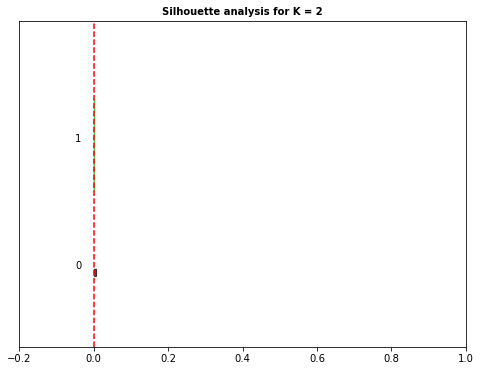

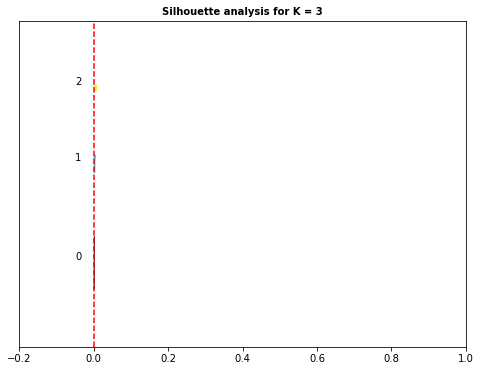

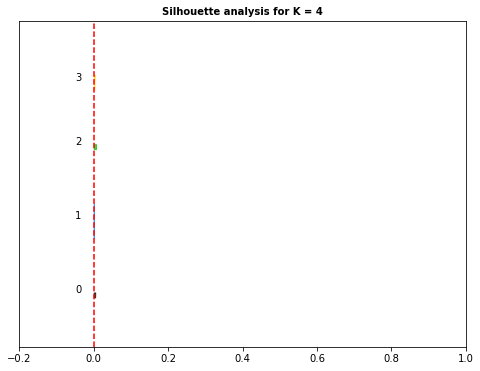

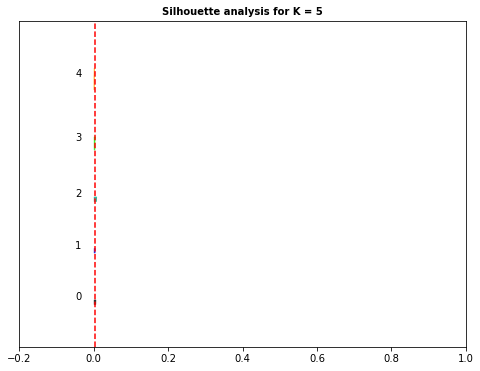

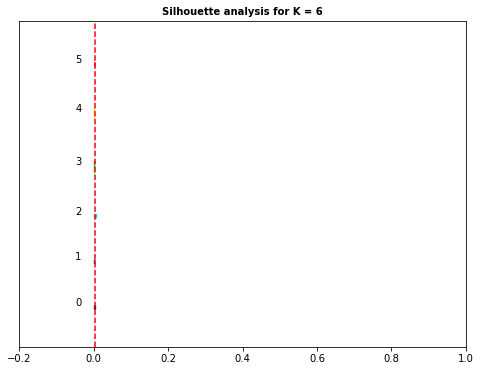

In [33]:
silhouette(kmeans_results, final_df, plot=True)

In [34]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

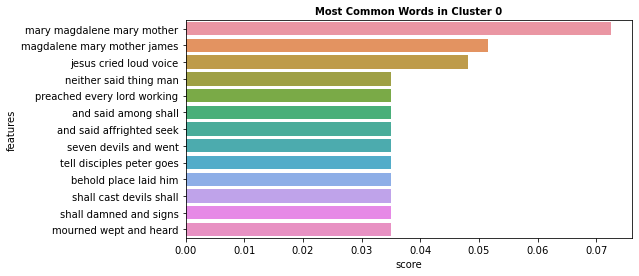

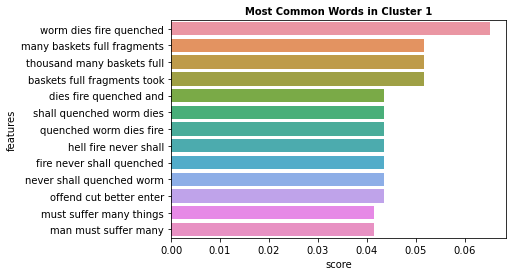

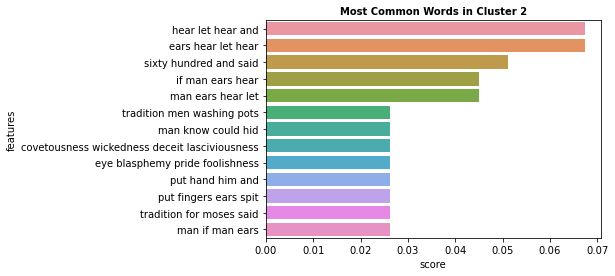

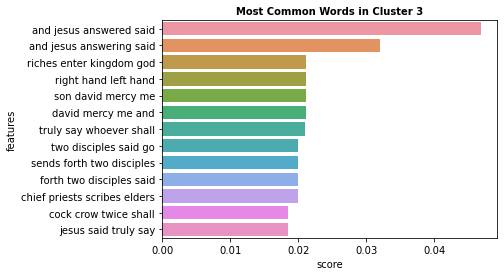

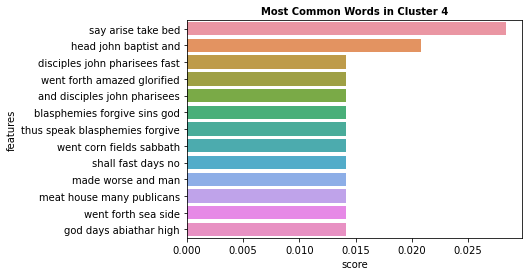

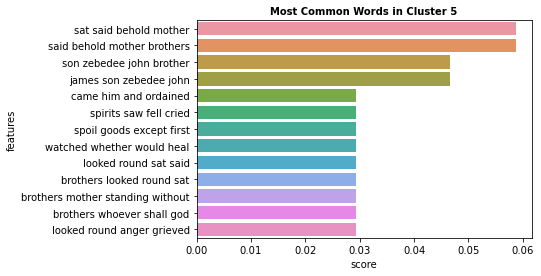

In [35]:
best_result = 6
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [36]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

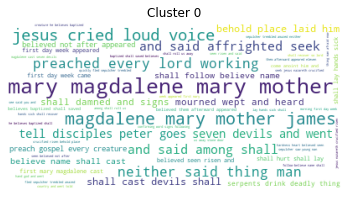

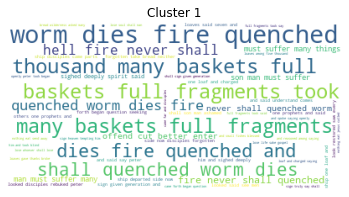

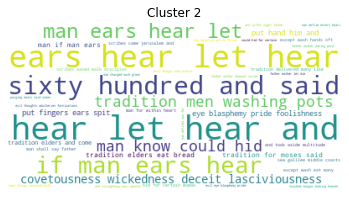

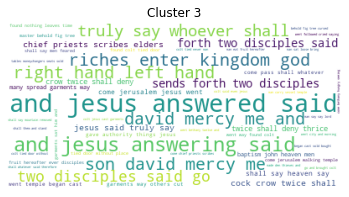

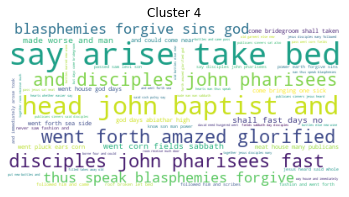

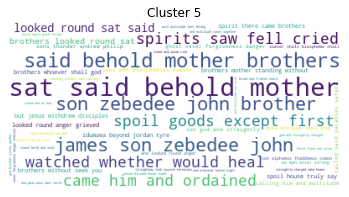

In [37]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [38]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Marcos_1,"'beginning', 'gospel', 'jesus', 'christ', ',',...",5
101,Marcos_2,"'entered', 'capernaum', 'days', ';', 'noised',...",4
102,Marcos_3,"'entered', 'synagogue', ';', 'man', 'withered'...",5
103,Marcos_4,"'began', 'teach', 'sea', 'side', ':', 'gathere...",2
104,Marcos_5,"'came', 'side', 'sea', ',', 'country', 'gadare...",4


In [39]:
print(df)

         Autor                                              Livro  label
100   Marcos_1  'beginning', 'gospel', 'jesus', 'christ', ',',...      5
101   Marcos_2  'entered', 'capernaum', 'days', ';', 'noised',...      4
102   Marcos_3  'entered', 'synagogue', ';', 'man', 'withered'...      5
103   Marcos_4  'began', 'teach', 'sea', 'side', ':', 'gathere...      2
104   Marcos_5  'came', 'side', 'sea', ',', 'country', 'gadare...      4
105   Marcos_6  'went', ',', 'came', 'country', ';', 'disciple...      4
106   Marcos_7  'came', 'together', 'pharisees', ',', 'certain...      2
107   Marcos_8  'days', 'multitude', 'great', ',', 'nothing', ...      1
108   Marcos_9  'said', ',', 'truly', 'say', ',', 'stand', ','...      1
109  Marcos_10  'arose', ',', 'comes', 'coasts', 'judaea', 'fa...      3
110  Marcos_11  'came', 'near', 'jerusalem', ',', 'bethphage',...      3
111  Marcos_12  'began', 'speak', 'parables', '.', 'certain', ...      3
112  Marcos_13  'went', 'temple', ',', 'one', 'disc

## Análise dos Agrupamentos 

Classe 1 agrupa os capitulos referente ao ensimanemto de cristo e seu ministerio servil.

Classe 2 agrupa os capitulos referente as caracteristas do recebimento da mensagem  do reino a hipocrisia de conduta dos fariseus (evidencia a disparidade da conduta dos fariseus e o padrão do perfil do cidadão do céu (ou seja, os fariseus estão distantes das caracteristicas dos que recebem de fato a palavra de Deus ou a mensagem do reino)

Classe 3 agrupa os dados da ida de Jesus a Jerusalem e sua condenação e ensimanentos morais referentes aos principios do reino

Classe 0 agrupa a morte e a ressureição de Cristo. 

Classe 0 (Marcos 15, 16)

Classe 1 (Marcos 1, 2, 3, 5, 6, 13)

Classe 2 (Marcos 7, 4)

Classe 3 (Marcos 10, 11, 12, 14)

Agrupamento com 4 grupos. Quadrigrams 

############################################################################################################################

Análise da Classe 3 agrupa os capitulos que tratam a necessidade de arrependimento com a disparidade da conduta não regenerada dos fariseus e a morte e ressuireção de Cristo. 

Análise da Classe 0 que agrupa os capitulos que tratam a das condições que os verdadeiros receptores da palavra possuem em contrapartida de como os fariseus recebiam a verdade. 

Análise da classe 1 que agrupa os capitulos que tratam das cenas dos profetas de Deus não sendo recebebidos. 

Análise da Classe 2 que agrupa os capitulos que tratam de aspectos morais e escatologicos do reino de Deus. 

Classe 0 (Marcos 4, 7)

Classe 1 (Marcos 6, 8, 9) 

Classe 2 (Marcos 10, 11, 12, 13, 14)

Classe 3 (Marcos 1, 2, 3, 15, 16)

Agrupamento com 4 grupos, trigrams. 

##############################################################################################################################

Análise da Classe 3 que agrupa os capitulos que tratam do arrependimento e embate de Cristo com os Fariseus, bem como curas. 

Análise da Classe 5 que agrupa os capitulos que tratam embate de Jesus com os fariseus.

Análise da Classe 0 que agrupa os capitulos que tratam das caracteristicas dos que recebem verdadeiramente a palavra de Deus (parabola do semeador) versus os que não recebem (os fariseus.) 

Análise da Classe 1 que agrupa os capitulos que tratam do chamado dos discipulos como os desafios do apostolado e rejeição que sofrerão. 

Análise da Classe 2 que agrupa os capitulos que tratam dos aspectos morais do reino de Deus e escatologicos do reino de Deus.

Analise da Classe 4 que agrupa os capitulos que tratam dos da condenação e ressuireição de Jesus. 


Classe 0 (Marcos 4, 7) 

Classe 1 (Marcos 6, 8, 9)

Classe 2 (Marcos 10, 11, 12, 13, 14)

Classe 3 (Marcos 1, 3, 5) 

Classe 4 (Marcos 15, 16) 

Classe 5 (Marcos 2)

Agrupamento com 6 grupos e trigrams

###########################################################################################################################

Análise da Classe 5 que agrupa os capitulos que tratam do arrependimento e do chamado dos doze. 

Análise da Classe 4 que agrupa os capitulos que tratam dos milagres servil de Cristo  e o sermão escatologico.  

Análise da Classe 2 que agrupa os capitulos que tratam das caracteristicas dos que de fato recebem a palavra de Deus verdadeiramente e os que não recebem. 

Análise da Classe 3 que agrupa os capitulos que tratam dos aspectos morais do reino de Deus. 

Análise da Classe 1 que agrupa os capitulos que tratam dos milagres de Jesus e da hipocrisia dos fariseus. 

Classe 0 (Marcos 15, 16)

Classe 1 (Marcos 8, 9) 

Classe 2 (Marcos 4, 7)

Classe 3 (Marcos 10, 11, 12, 14) 

Classe 4 (Marcos 2, 4, 6, 13)

Classe 5 (Marcos 1, 3)

Agrupamento com 6  grupos e quadrigrams. 